# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Цель исследования:  
Определить рыночную стоимость объектов недвижимости. Для этого нам нужно - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
Важно изучить все данные на предмет влзможных человеческих/технических ошибок.  

Соответственно, в моём исследовании будут следующие этапы:  
1. Изучить датасет на предмет аномалий, пропусков, ошибок и ,по возможности, исправить их.  
2. При необходимости создать дополнительные категории по имеющимся данным.  
3. Найти критерии, которые влияют на стоимость продажи квартир.  
4. Визуализировать полученную информацию  
5. Сформулировать итоговый вывод по результатам исследования.

## Шаг 1. Откроем файл с данными и изучим общую информацию. 

### Выгрузка датасета и общая информация

In [123]:
# импортируем нужные библиотеки
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#загрузим файл и посмотрим на данные
dev = pd.read_csv('real_estate_data.csv', sep='\t')

dev.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11135,16,7490000.0,80.0,2015-03-11T00:00:00,3,NaN,10.0,50.00,9,NaN,...,11.00,1.0,Санкт-Петербург,12534.0,12447.0,0.0,NaN,1.0,545.0,1059.0
14898,13,8100000.0,76.0,2018-10-11T00:00:00,3,2.65,14.0,44.50,6,NaN,...,10.00,NaN,Санкт-Петербург,29270.0,6642.0,0.0,NaN,3.0,247.0,190.0
23294,16,5600000.0,70.0,2017-07-16T00:00:00,3,NaN,25.0,45.00,12,NaN,...,9.30,1.0,Санкт-Петербург,43440.0,9294.0,0.0,NaN,0.0,NaN,64.0
19978,7,4000000.0,30.9,2019-04-29T00:00:00,1,NaN,5.0,15.00,4,NaN,...,5.60,1.0,Санкт-Петербург,29744.0,5916.0,0.0,NaN,3.0,892.0,NaN
6635,8,5817600.0,80.8,2018-01-10T00:00:00,3,2.75,23.0,41.19,10,False,...,20.38,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,13.0
22609,18,3200000.0,53.0,2018-01-04T00:00:00,2,2.60,9.0,NaN,5,NaN,...,NaN,NaN,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23370,20,16000000.0,102.0,2018-11-25T00:00:00,3,2.76,22.0,55.00,16,NaN,...,21.00,2.0,Санкт-Петербург,34463.0,11879.0,0.0,NaN,0.0,NaN,NaN
1978,11,5700000.0,50.0,2018-02-20T00:00:00,2,2.65,4.0,24.00,4,NaN,...,7.50,NaN,Санкт-Петербург,21980.0,1514.0,0.0,NaN,2.0,536.0,77.0
10597,6,3300000.0,43.6,2017-09-25T00:00:00,2,NaN,5.0,28.20,4,NaN,...,5.10,1.0,Пушкин,14197.0,26350.0,0.0,NaN,0.0,NaN,78.0
22745,16,5600000.0,59.0,2017-12-18T00:00:00,3,NaN,9.0,39.90,6,NaN,...,6.30,1.0,Санкт-Петербург,49839.0,15544.0,0.0,NaN,0.0,NaN,107.0


В датасете содержаться следующие данные:

_airports_nearest_ — расстояние до ближайшего аэропорта в метрах (м)  
_balcony_ — число балконов  
_ceiling_height_ — высота потолков (м)  
_cityCenters_nearest_ — расстояние до центра города (м)  
_days_exposition_ — сколько дней было размещено объявление (от публикации до снятия)  
_first_day_exposition_ — дата публикации  
_floor_ — этаж  
_floors_total_ — всего этажей в доме  
_is_apartment_ — апартаменты (булев тип)  
_kitchen_area_ — площадь кухни в квадратных метрах (м²)  
_last_price_ — цена на момент снятия с публикации  
_living_area_ — жилая площадь в квадратных метрах (м²)  
_locality_name_ — название населённого пункта  
_open_plan_ — свободная планировка (булев тип)  
_parks_around3000_ — число парков в радиусе 3 км  
_parks_nearest_ — расстояние до ближайшего парка (м)  
_ponds_around3000_ — число водоёмов в радиусе 3 км  
_ponds_nearest_ — расстояние до ближайшего водоёма (м)  
_rooms_ — число комнат  
_studio_ — квартира-студия (булев тип)  
_total_area_ — общая площадь квартиры в квадратных метрах (м²)  
_total_images_ — число фотографий квартиры в объявлении  

In [125]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Всего 22 столбца, в 12 из которых есть пропуски, часть из них логически обоснованы, часть пока не понятны, разберемся с этим на этапе предобработки.

In [126]:
dev.duplicated().sum()

0

Явных дубликатов, например, задвоеных одинаковых объявлений, нет.

### Информация о количественных данных

In [127]:
#посмотрим на количественный разброс данных

dev.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


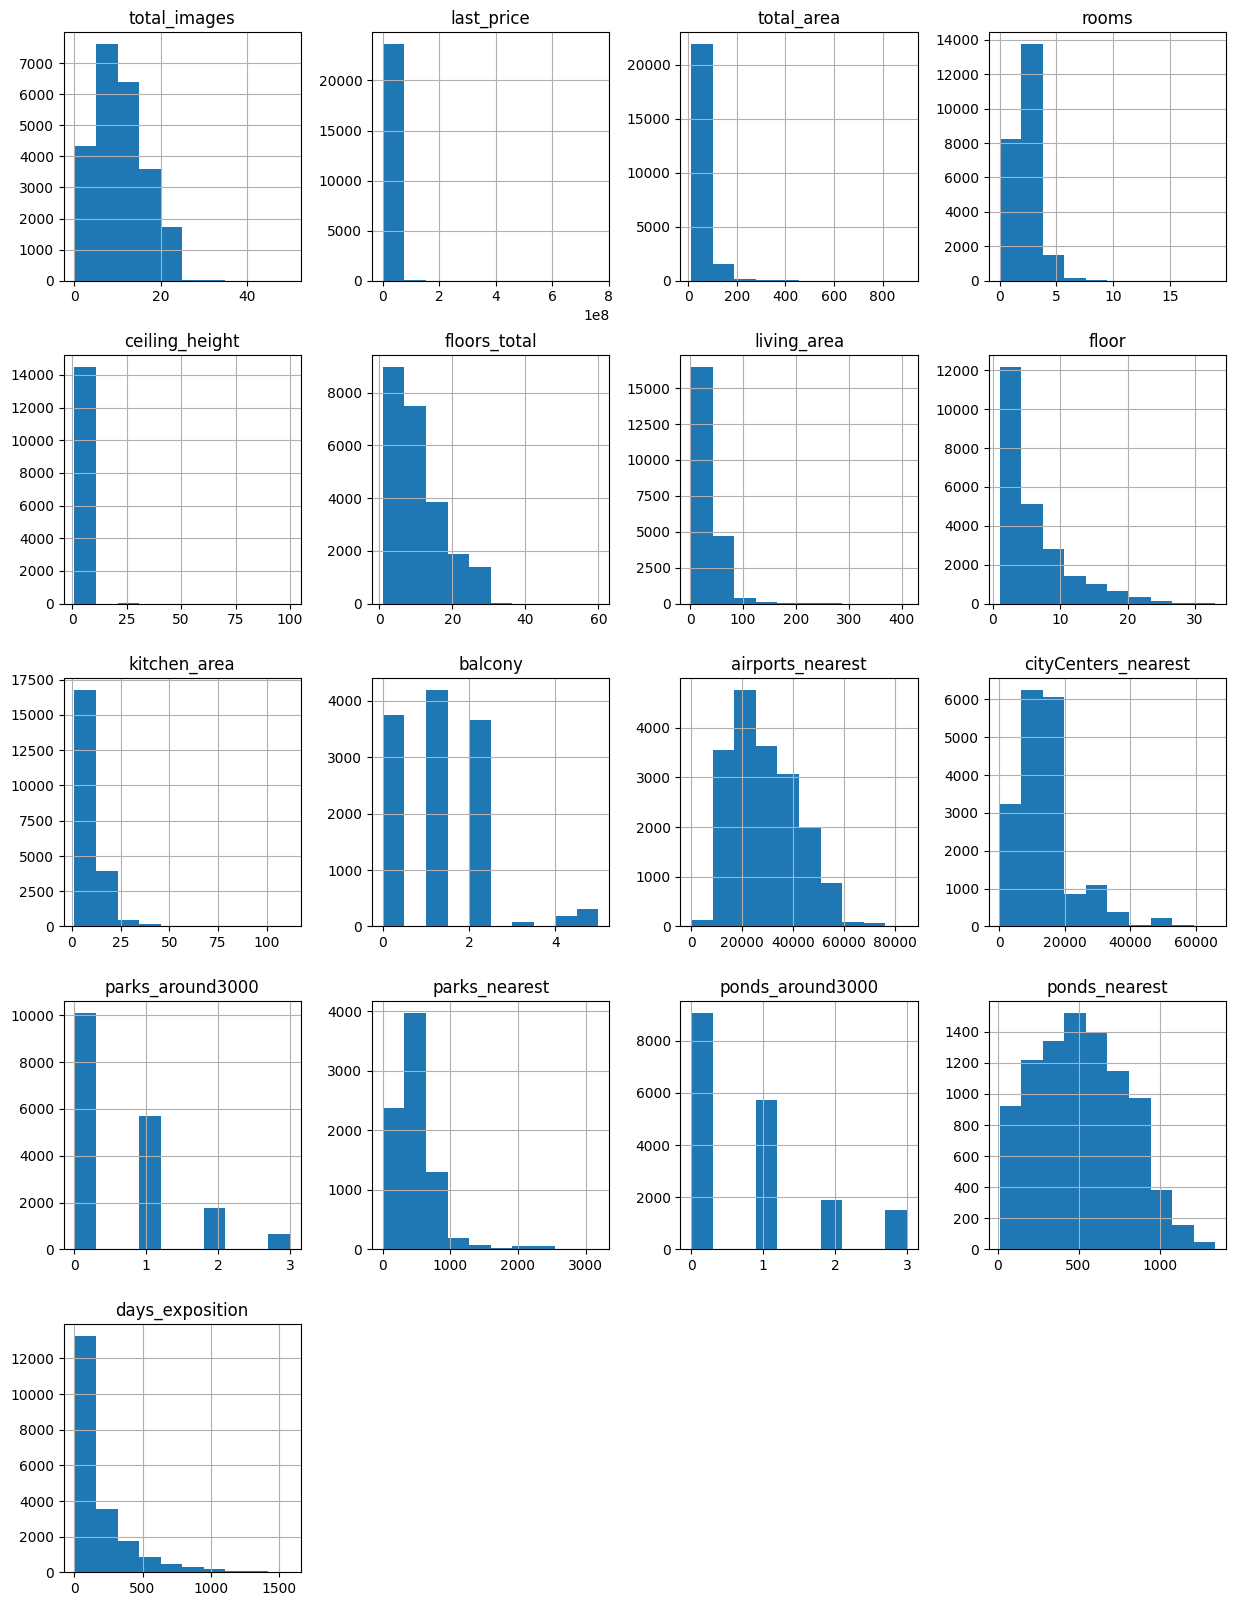

In [128]:
dev.hist(figsize=(15, 20))
plt.show()

**Вывод:**
Данных для анализа предварительно достаточно.  
Однако имеются слующие недочеты:

1. Эстетически некорректные названия столбцов, например, _cityCenters_nearest_ 
2. В 12 столбцах есть пропуски 
3. Всречаются аномальные значения, например, потолок 100м
4. Некорректные типы данных, например _is_apartment_ предполагается булевое значение, а тип данных **object**

Все эти аномалии разберем подробнее на этапе предобработки и исправим их, если это понадобится. 
Так же, возможно, будут обнаружены какие-то еще недочеты в данных.

## Шаг 2. Предобработка данных

### Приведем название столбцов к единому виду и стилю

In [129]:
dev = dev.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                          'open_plan': 'is_open_plan',
                         'parks_around3000': 'parks_around_3000',
                          'ponds_around3000': 'ponds_around_3000',
                          'studio': 'is_studio'
                         })
dev.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Обработка и исследование столбцов

#### locality_name

Начнем со столбца с названием населенного пункта, т.к. там есть неявные дубликаты и это может помешать нам с обработкой других столбов.

In [130]:
dev['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из очевидных проблем "Посёлок"/"Поселок", "Поселок городского типа"/"Поселок" и прочие разнописания типа населенного пункта.
Для того, чтобы точно убрать все подобные неявные дубликаты, уберем все обозначения типов населенных пунктов и оставим только Названия.  
С учетом, что все объявления по Ленинградской области, врядли там есть и Поселок и Деревня с одинаковым названием.

In [131]:
# создадим список со всеми встречающимися типами 

locality_type = [
    'садовое товарищество',
    'коттеджный посёлок',
    'поселок городского типа',
    'городской посёлок',
    'село',
    'посёлок при железнодорожной станции',
    'садоводческое некоммерческое товарищество',
    'городской поселок',
    'поселок станции',
    'садовое товарищество',
    'посёлок городского типа',
    'городской посёлок',
    'деревня',
    'посёлок',
    'поселок',
    'городской',
    'городского типа',
    'коттеджный',
    'при железнодорожной станции',
    'железнодорожной станции',
    'станции'
]

In [132]:
#заменим типы на пробел и удалим все лишние пробелы
for t in locality_type:
    dev['locality_name'] = dev['locality_name'].str.replace(t, '').str.strip()

In [133]:
dev['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск',
       'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа',
       'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор',
       'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войскорово', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк',
       'Гаврилово', 'Гарболово', 'Гатчина', 'Глинка', 'Горбунки',
       'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка',
       'Дубровка', 'Ефимовский', 'Жилгородок', 'Заклинье', 'Заневка',
       'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво',
       'Иссад', 'Калитино', 'Кальтино', 'Каменногорск', 'Камышовка',
       'Каськово', 'Келози', 'Кикерино', 'Кингисепп', 'Кипень', 'Кириши',
       'Кировск', 'Кисельня', 'Кобра

Дубликаты устранены.

In [134]:
print(dev['locality_name'].value_counts())
print('Безымянные', dev['locality_name'].isna().sum())

Санкт-Петербург     15721
Мурино                556
Кудрово               472
Шушары                440
Всеволожск            398
                    ...  
Трубников Бор           1
Вахнова Кара            1
пок Усть-Луга           1
Старое Хинколово        1
Зимитицы                1
Name: locality_name, Length: 341, dtype: int64
Безымянные 49


Более 65% квартир продаются в Санкт-Петербурге.
В 49 объявлениях населенный пункт пропущен, посмотрим на пример таких данных.

In [135]:
dev[dev['locality_name'].isna()].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
21119,8,3500000.0,43.20,2018-11-11T00:00:00,2,NaN,4.0,NaN,2,NaN,...,NaN,NaN,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
18917,3,2660000.0,37.99,2017-08-17T00:00:00,1,NaN,4.0,13.0,1,NaN,...,12.4,0.0,NaN,21540.0,8429.0,0.0,NaN,3.0,142.0,15.0
14342,3,3611000.0,53.50,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
14273,2,4422000.0,60.00,2016-03-23T00:00:00,2,2.75,23.0,32.0,14,NaN,...,11.9,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
21276,0,17122148.0,178.30,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,NaN,...,41.6,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
17535,2,5985000.0,79.80,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20654,7,6100000.0,43.00,2016-01-13T00:00:00,1,NaN,5.0,21.0,3,NaN,...,12.0,1.0,NaN,24385.0,4604.0,1.0,700.0,0.0,NaN,164.0
9821,13,8000000.0,94.50,2015-01-21T00:00:00,4,3.00,2.0,57.8,2,NaN,...,11.3,0.0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531.0
23214,3,7990000.0,56.00,2016-05-31T00:00:00,2,NaN,6.0,NaN,5,False,...,NaN,0.0,NaN,11206.0,8943.0,0.0,NaN,0.0,NaN,70.0


Мне не представляется возможным по каким-либо критерием вычислить город, потому оставим пропуски как есть, остальные данные присутствуют, удалять их ни к чему.  
С учетом, что прочие картографические даные (расстояние до центра, до аэропорта и тд) подтянуты, видимо, населенные пункты какие-то мелкие и не отображающиеся на тот момент времени на картах яндекса. по типу дачных СНТ и тд.

####  is_apartment, is_studio, is_open_plan

Перейдем к столбцам, в которых должны быть булевые значения, и обработаем в них пропуски.

In [136]:
#еще раз вернемся к информации о них
dev[['is_apartment', 'is_studio', 'is_open_plan']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_apartment  2775 non-null   object
 1   is_studio     23699 non-null  bool  
 2   is_open_plan  23699 non-null  bool  
dtypes: bool(2), object(1)
memory usage: 231.6+ KB


Как видим, проблемы есть только со столбцом _is_apartment_, в нем есть пропуски и не верный тип данных.
Логично предположить, что, если в объявление не указан призак Апартаментов, то квартира ими и не является, потому все пропуски заменим на False и сразу изменим тип данных на bool.

In [137]:
dev['is_apartment'] = dev['is_apartment'].fillna('').astype('bool')

In [138]:
print('Количество пропусков', dev['is_apartment'].isna().sum())
print('Тип данных', dev['is_apartment'].dtypes)

Количество пропусков 0
Тип данных bool


**Подготовим две функции для упрощения исследования количественных столбцов:**
1. Вывод подробной информации о количественных данных 
2. Построение диаграммы, графика

In [139]:
#Детальная информация о количественных данных

def total_describe(data, column):
    null_sum = data[column].isnull().sum()
    types = data[column].dtypes
    describe = data[column].describe().round(2)
    print(f'Пропусков: {null_sum}')
    print(f'Тип данных: {types}')
    print('Детально:')
    print(describe)
    
#построение гистограммы

def hist_creature(data, name, title):
    plt.figure(figsize=(10,5))
    data.hist()
    plt.xlabel(name)
    plt.title(title)
    plt.show()


#### total_images

Пропусков: 0
Тип данных: int64
Детально:
count    23699.00
mean         9.86
std          5.68
min          0.00
25%          6.00
50%          9.00
75%         14.00
max         50.00
Name: total_images, dtype: float64


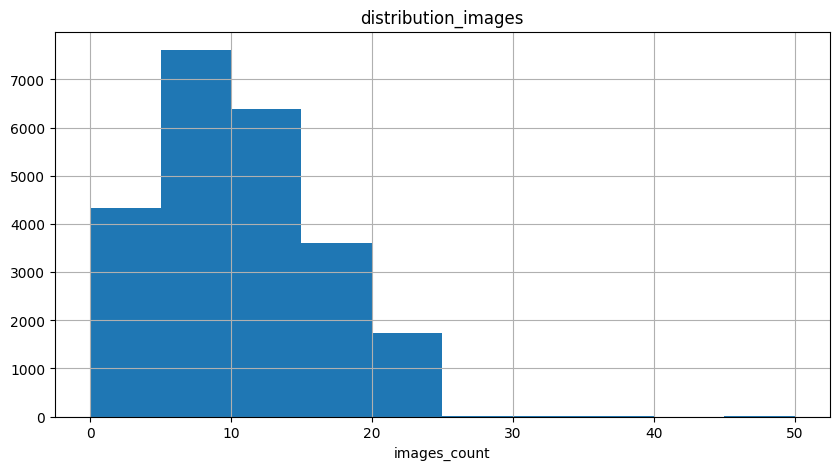

In [140]:
total_describe(dev, 'total_images')
hist_creature(dev['total_images'], 'images_count', 'distribution_images')

Чаще всего размещают 5-10 фотографий. 
Количество фото более 25 очень редки, однако это имеет место быть, пока с ними ничего делать не будем. 

Немало объявлений с количеством фото 0, в целом это так же возможно, но посмотрим подробнее.

In [141]:
#количество объявлений с 0 фото и доля

print('Количество нулей:',(dev['total_images'] == 0).sum())
print('Доля объявлений с нулями:',((dev['total_images'] == 0).sum()/dev['total_images'].count()*100).round(2))

Количество нулей: 1059
Доля объявлений с нулями: 4.47


In [142]:
dev[dev['total_images'] == 0].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12027,0,3000000.0,30.00,2019-03-20T00:00:00,1,NaN,12.0,16.0,2,False,...,7.00,NaN,Санкт-Петербург,32702.0,12243.0,0.0,NaN,0.0,NaN,5.0
846,0,2990000.0,43.00,2017-11-21T00:00:00,2,2.70,4.0,28.0,2,False,...,6.00,NaN,Колпино,27143.0,32929.0,0.0,NaN,1.0,601.0,63.0
4409,0,2100000.0,33.00,2015-12-18T00:00:00,1,2.50,2.0,20.0,2,False,...,9.00,0.0,пок Стеклянный,NaN,NaN,NaN,NaN,NaN,NaN,206.0
8685,0,5500000.0,60.70,2017-03-09T00:00:00,2,NaN,16.0,32.5,15,False,...,12.40,2.0,Санкт-Петербург,27326.0,9140.0,0.0,NaN,0.0,NaN,118.0
21165,0,7400000.0,84.20,2018-02-01T00:00:00,4,2.50,5.0,60.4,2,False,...,8.00,NaN,Ломоносов,48607.0,36816.0,0.0,NaN,2.0,118.0,114.0
7703,0,2300000.0,36.00,2017-03-14T00:00:00,1,NaN,5.0,17.0,3,False,...,9.00,NaN,Вырица,NaN,NaN,NaN,NaN,NaN,NaN,283.0
480,0,7050000.0,78.00,2015-11-18T00:00:00,3,NaN,5.0,54.0,3,False,...,8.00,1.0,Санкт-Петербург,21868.0,10779.0,3.0,226.0,0.0,NaN,470.0
20233,0,2450000.0,25.00,2017-10-01T00:00:00,1,NaN,9.0,18.0,3,False,...,NaN,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,59.0
17642,0,7300000.0,78.61,2018-11-08T00:00:00,3,2.95,4.0,44.9,3,False,...,11.53,NaN,Санкт-Петербург,31581.0,3205.0,0.0,NaN,0.0,NaN,82.0
23135,0,3750000.0,45.20,2017-11-23T00:00:00,2,NaN,9.0,29.7,7,False,...,9.50,NaN,Санкт-Петербург,20875.0,13518.0,0.0,NaN,1.0,759.0,111.0


Никакой закономерности не наблюдается, потому оставим как есть, тем более, что объявления без фотографий весьма реальны.

#### floors_total, floor

Пропусков: 0
Тип данных: int64
Детально:
count    23699.00
mean         5.89
std          4.89
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64


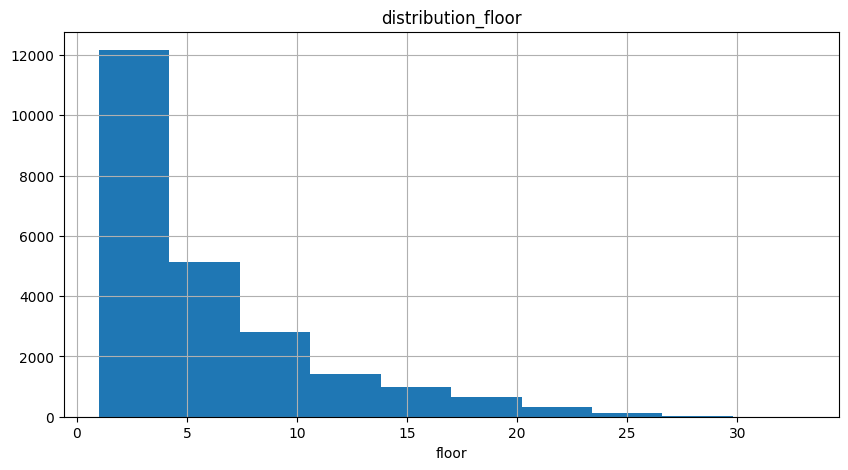

In [143]:
total_describe(dev, 'floor')
hist_creature(dev['floor'], 'floor', 'distribution_floor')

Пропусков нет, тип данных соответствует целочисленному.  
Наиболее распространены на продажу квартиры на 1-4 этажах.  
Нереальных выбивающихся значений так же не заметно.

Пропусков: 86
Тип данных: float64
Детально:
count    23613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64


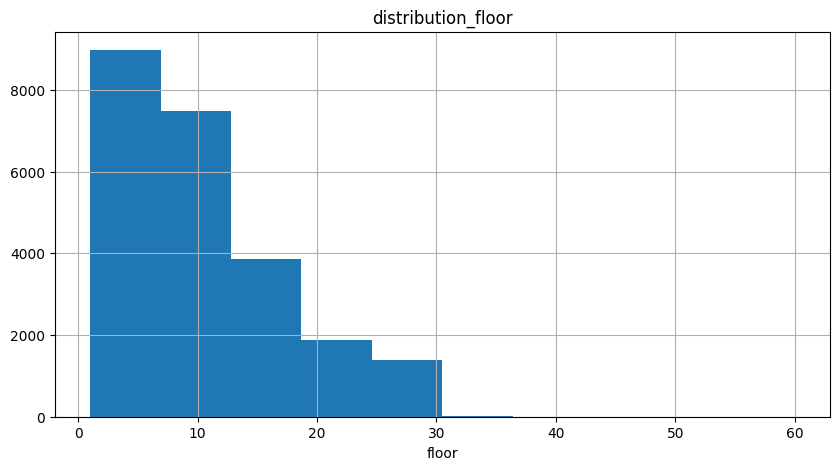

In [144]:
total_describe(dev, 'floors_total')
hist_creature(dev['floors_total'], 'floor', 'distribution_floor')

Наиболее распространены так же малоэтажки.  
Максимальный этаж 60 - не самые популярные здания, однако, самое высокое здание с жилыми квартирами в СПб - "Лаха - центр" высотой в 87 этажей.  
Однако посмотрим на 5 самый высоких зданий в объявлениях.

In [145]:
dev.sort_values('floors_total', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,False,...,18.70,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,False,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


В Кронштадте 60-этажных- зданий нет, можно предположить, что это 6-этажка и заменить это значение соответственно.

In [146]:
dev['floors_total'] = dev['floors_total'].replace(60, 6)

Есть пропуски.  
Пропуски можно заполнить, отталкиваясь от указанного этажа.  
Однако, мне кажется, приравнять этажность дома к указанному этажу конкретной квартиры не совсем корректно, т.к. чисто математически, квартир не на последнем этаже всегда больше.  
Потому, заполним этажность от Этаж квартиры + 1. И сразу изменим тип данных на целочисленный.

In [147]:
dev.loc[dev['floors_total'].isna(), 'floors_total'] = dev.loc[dev['floors_total'].isna()] ['floor'] + 1
dev['floors_total'] = dev['floors_total'].astype(int)

In [148]:
#проверим
total_describe(dev, 'floors_total')

Пропусков: 0
Тип данных: int64
Детально:
count    23699.00
mean        10.67
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         52.00
Name: floors_total, dtype: float64


#### balcony

In [149]:
total_describe(dev, 'balcony')

Пропусков: 11519
Тип данных: float64
Детально:
count    12180.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64


Можно предположить, что, если количество балконов не указано, то их нет.  
В современных новостройках часто нет балконов + первые этажи без них + продавец может не считать лоджию балконом, пропустить этот пункт и указать лоджию в тексте объявления.  
Заменим все пропуски на 0 и исправим тип данных на целочисленный.

In [150]:
dev['balcony'] = dev['balcony'].fillna(0).astype('int')

Пропусков: 0
Тип данных: int64
Детально:
count    23699.00
mean         0.59
std          0.96
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony, dtype: float64


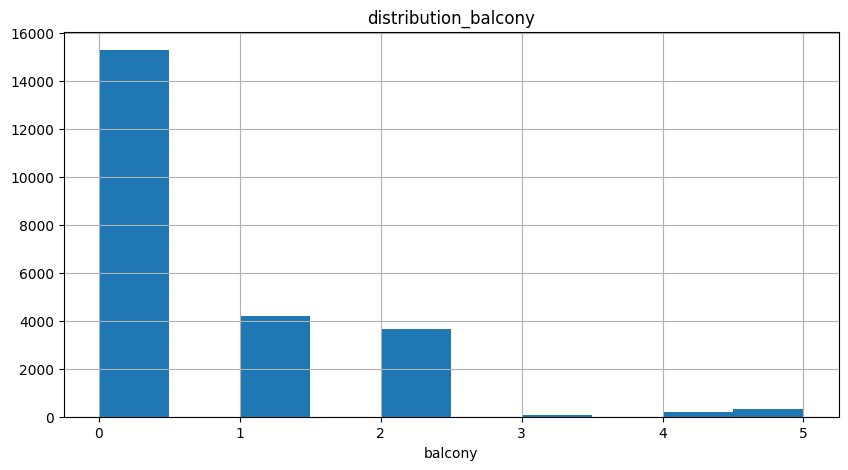

In [151]:
total_describe(dev, 'balcony')
hist_creature(dev['balcony'], 'balcony', 'distribution_balcony')

#### last_price

Пропусков: 0
Тип данных: float64
Детально:
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


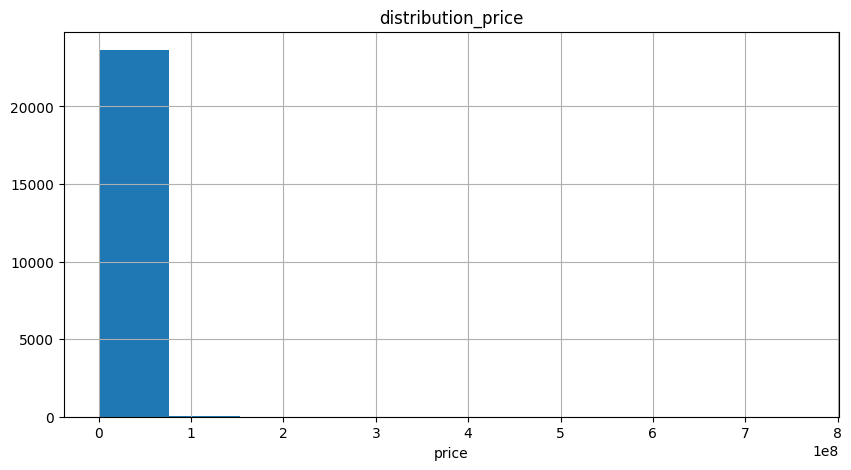

In [152]:
total_describe(dev, 'last_price')
hist_creature(dev['last_price'], 'price', 'distribution_price')


Средняя цена - примерно 654млн  
Медиана - 465млн, значит, есть перекосы. 

Минимально значение - 12т.р
Максимальное 763млн.

Посмотрим на крайние значения.

In [153]:
# 10 самых дешевых объявлений
dev.sort_values('last_price').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2,16.0,1,False,...,6.0,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3,NaN,3,False,...,NaN,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5,NaN,1,False,...,NaN,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5,17.3,4,False,...,8.5,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2,NaN,1,False,...,NaN,0,Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5,30.3,3,False,...,5.5,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1,23.0,1,False,...,5.8,0,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3,NaN,3,False,...,NaN,0,пок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5,32.0,3,False,...,9.0,0,Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


Однозначно неадекватным здесь кажется только первая строка с 2х комнатной квартирой на 25 этаже в Санкт-Петербурге.
С учетом прочих характеристик, будет корректно предположить, что цена указана в тыс.руб, а не просто в руб. и умножить данное значение на 1000

In [154]:
dev['last_price'] = dev['last_price'].replace(12190, 12190000)

In [155]:
# 10 самых дорогих
dev.sort_values('last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10,250.0,10,False,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6,63.7,6,False,...,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7,182.8,4,False,...,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7,218.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8,132.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


Цена в 763млн кажется однозначно неадекватной, насчет всего остального не очень понятно.  
Попробуем диаграмму распределения. Выборку возьмем только по Санкт-Петербургу, т.к. очевидно, что квартиры в городе дороже, чем в посёлках. По крайней мере 10 самых дорогих квартир именно в СПб

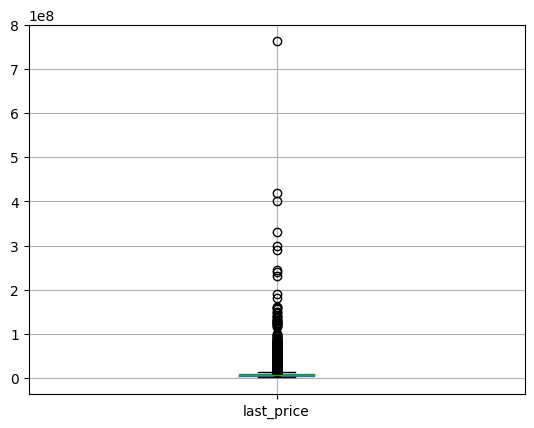

In [156]:
dev[dev['locality_name'] == 'Санкт-Петербург'].boxplot('last_price')
plt.show()

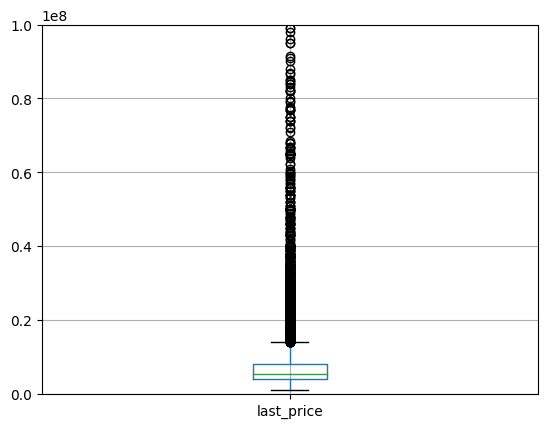

In [157]:
dev[dev['locality_name'] == 'Санкт-Петербург'].boxplot('last_price') #посмотрим поближе
plt.ylim(0, 100000000)
plt.show()

Согласно диаграмме распределения, всё, что дороже примерно 15млн, можно считать выбросами.  
Однако, таких значений слишком много, поэтому, скорее это просто элитное жилье.  
А вот квартира, стоимостью 763млн слишком далека от всех остальных значений, не имея каких-то обоснований, судя по остальным данным, при этом, такое значение всего одно, потому мы можем его удалить.

In [158]:
dev = dev.loc[dev['last_price'] < 700000000] 

In [159]:
#проверим
total_describe(dev, 'last_price')

Пропусков: 0
Тип данных: float64
Детально:
count    2.369800e+04
mean     6.510142e+06
std      9.715084e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64


#### total_area, living_area, kitchen_area

Пропусков: 0
Тип данных: float64
Детально:
count    23698.00
mean        60.33
std         35.59
min         12.00
25%         40.00
50%         52.00
75%         69.88
max        900.00
Name: total_area, dtype: float64


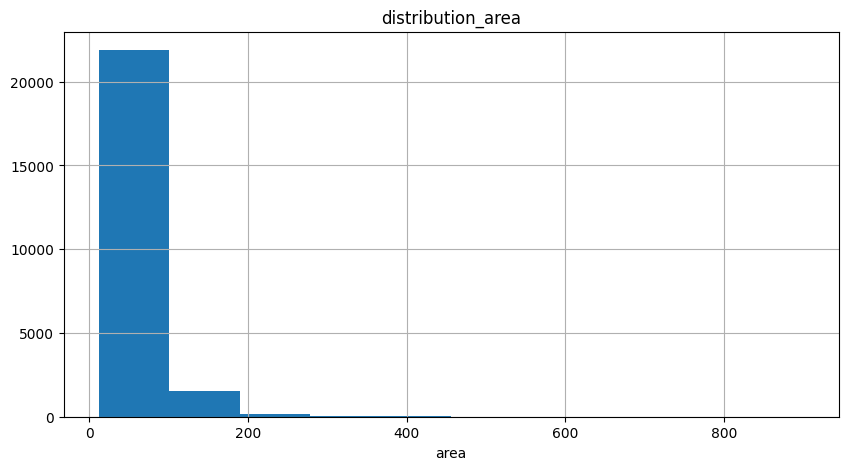

In [160]:
total_describe(dev, 'total_area')
hist_creature(dev['total_area'], 'area', 'distribution_area')

Чаще всего продают квартиры до 100кв.м.  
Минимальная площадь 12кв  
Максимальная 900.  

Согласно СНиП 31-01-2003:  

**_"Площадь квартир социального использования государственного и муниципального жилищных фондов согласно ЖК РФ должна быть не менее:_**

**_► Общей жилой комнаты в однокомнатной квартире — 14 м²._**

**_► Общей жилой комнаты в квартирах с числом комнат две и более — 16 м²._**

**_► Спальни — 8 м² (на двух человек — 10 м²); кухни — 8 м²._**

**_► Кухонной зоны в кухне-столовой — 6 м²._**

**_► В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м²."_**  
Т.е минимальная площадь квартиры должна быть 19кв.м., однако эти строительные нормы всё же для соц.недвижимости, и застройщики им следуют не всегда.  
Поиск на Циане и прочих сайтах агрегаторах показывает наличие квартир и 12кв и 900, т.е значения могут быть реальными и адекватными.  
Но всё же посмотрим на крайние значения поближе.


In [161]:
(dev['total_area'] < 19).sum()

24

In [162]:
#посмотрим 

dev.query('total_area < 19')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9,12.00,1,False,...,NaN,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
4542,12,3300000.0,18.00,2018-11-07T00:00:00,1,3.50,5,9.00,2,False,...,NaN,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0
6084,6,770000.0,18.00,2017-10-16T00:00:00,1,NaN,5,13.00,4,False,...,3.0,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3,14.00,3,False,...,2.4,0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
8755,1,1350000.0,18.80,2017-11-22T00:00:00,0,2.75,19,15.80,1,False,...,NaN,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
8886,10,2450000.0,15.50,2018-08-22T00:00:00,0,NaN,5,10.00,2,False,...,NaN,0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9157,0,3400000.0,17.60,2018-03-18T00:00:00,1,NaN,5,15.00,2,False,...,NaN,0,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0
9412,5,2100000.0,16.00,2017-12-10T00:00:00,0,NaN,6,13.00,1,False,...,NaN,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
10208,3,1900000.0,17.00,2018-08-14T00:00:00,1,2.75,4,13.00,2,False,...,3.0,0,Санкт-Петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0
12040,5,1900000.0,15.00,2018-06-27T00:00:00,1,2.50,5,NaN,1,False,...,NaN,0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Всего 24 квартиры, не вписывающиеся в СНиП, статистически они врядли на что-то повлияют.  
При этом каких-то еще закономерностей пока не видно, но другие данные имеются по этим объявлениям.    
Потому пока что мы их оставим, возможно, их потребуется удалить позже.

In [163]:
#теперь посмотрим на максимальные значения
dev.sort_values('total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5,NaN,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4,332.0,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7,NaN,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
15016,8,150000000.0,500.0,2016-01-13T00:00:00,4,3.20,7,NaN,7,False,...,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7,347.5,7,False,...,25.0,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0


Квартира в 900кв.м слишком сильно выбивается, при этом она далеко не самая дорогая, у неё не самое большое количество комнат и даже площадь жилой зоны и кухни не выбивается так сильно, как общая квадратура.    
На мой взгляд, это может повлиять на последующий анализ корреляции, потому, возьму на себя смелость удалить эту строку из выборки.

In [164]:
dev = dev[dev['total_area'] < 900]

In [165]:
#проверим
total_describe(dev, 'total_area')

Пропусков: 0
Тип данных: float64
Детально:
count    23697.00
mean        60.30
std         35.17
min         12.00
25%         40.00
50%         52.00
75%         69.80
max        631.20
Name: total_area, dtype: float64


Пропусков: 1903
Тип данных: float64
Детально:
count    21794.00
mean        34.43
std         21.84
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.00
Name: living_area, dtype: float64


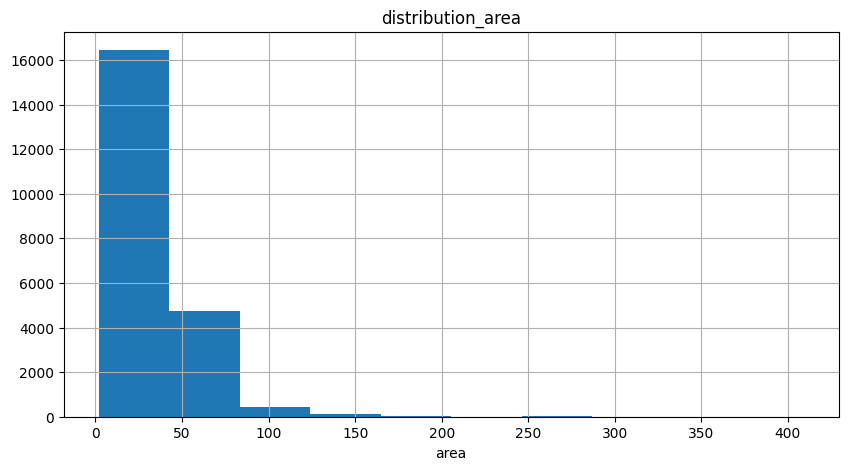

In [166]:
#переходим к жилой площади
total_describe(dev, 'living_area')
hist_creature(dev['living_area'], 'area', 'distribution_area')

Весомое количество пропусков.  
Чаще всего продаются квартиры с жилой площадью до 40кв.м.  

Вызывает сомнение минимальная площадь в 2кв (как мы помним из СНиП, минимальная площадь данного помещения 14кв.м).  
Посмотрим на объявления с жилой площадью меньше 14кв.м.
Однако, мы приняли за данность квартиры с общей площадью 12кв.м, соответственно и минимальную жилую площадь нужно сократить.  

Посчитаем долю жилой площади от общей по СНиП - 73,6%.  
Теперь найдем по той же логике минимальную жилую площадь от 12кв.м общей - 8,8кв.м.  

Посмотрим на данные в разрезе жилой площади меньше 8,8кв.м

In [167]:
(dev['living_area'] < 8.8).sum()

13

In [168]:
dev.query('living_area < 8.8').sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.90,8,8.3,7,False,...,6.3,0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,NaN,25,5.0,8,False,...,NaN,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24,2.0,22,False,...,NaN,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.60,5,6.0,1,False,...,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.50,22,6.5,21,False,...,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
21505,9,4100000.0,35.3,2018-01-10T00:00:00,1,2.75,27,8.5,11,False,...,16.1,2,Санкт-Петербург,33977.0,15076.0,0.0,NaN,0.0,NaN,60.0
23208,12,4800000.0,37.0,2016-02-24T00:00:00,1,NaN,14,8.0,11,False,...,22.0,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
20994,7,8900000.0,50.6,2018-10-22T00:00:00,2,2.50,7,8.0,3,False,...,31.0,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,NaN
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0


В полученных результатах несколько странно выглядит площадь жилого помещения в сравнении с общей площадью квартиры и ценой.  
13 строк других данных врядли сильно скажутся на статистике, потому, считаю возможным их удалить.

In [169]:
dev = dev[(dev['living_area'].isna()) | (dev['living_area'] >= 8.8)]   

In [170]:
#проверим

total_describe(dev, 'living_area')

Пропусков: 1903
Тип данных: float64
Детально:
count    21781.00
mean        34.45
std         21.83
min          8.90
25%         18.60
50%         30.00
75%         42.30
max        409.00
Name: living_area, dtype: float64


In [171]:
#посмотрим на максимальные значения

dev.sort_values('living_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7,347.5,7,False,...,25.0,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4,332.0,3,False,...,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6,312.5,4,False,...,26.4,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
14088,8,51000000.0,402.0,2017-02-07T00:00:00,6,3.15,8,300.0,6,False,...,56.0,2,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0
20273,12,20000000.0,460.8,2019-03-20T00:00:00,6,3.10,3,279.6,1,False,...,55.5,0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9,274.0,9,False,...,45.0,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


Здесь данные не вызывают подозрений.

Пропусков: 2275
Тип данных: float64
Детально:
count    21409.00
mean        10.56
std          5.86
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        107.00
Name: kitchen_area, dtype: float64


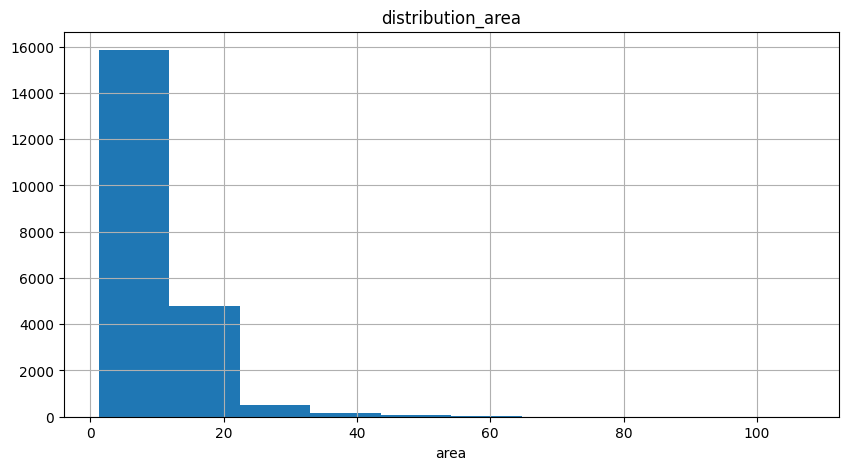

In [172]:
total_describe(dev, 'kitchen_area')
hist_creature(dev['kitchen_area'], 'area', 'distribution_area')

Чаще всего продаются квартиры с площадью кухни до 10кв.м.  
Минимальная площадь 1,3кв  
Максимальная 107.  
Весомое количество пропусков, с ними разберемся чуть позже, как и с пропусками по жилой площади.  

Посмотрим на крайние значения.

In [173]:
dev.sort_values('kitchen_area').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.50,2019-05-01T00:00:00,1,2.80,14,19.5,10,False,...,1.3,0,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5,16.0,5,False,...,2.0,0,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
21419,4,1870000.0,20.00,2018-03-06T00:00:00,1,2.50,5,14.0,1,False,...,2.0,0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23,18.0,18,False,...,2.0,0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
11033,6,5350000.0,32.00,2016-04-20T00:00:00,1,NaN,14,16.0,10,False,...,2.0,0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
19642,5,1190000.0,14.00,2018-07-29T00:00:00,1,NaN,5,11.0,1,False,...,2.0,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
16367,2,2720000.0,25.70,2017-10-30T00:00:00,1,NaN,19,22.6,11,False,...,2.0,0,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
9138,17,2920000.0,23.29,2018-12-12T00:00:00,1,NaN,3,21.0,1,False,...,2.0,0,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
17834,5,2940000.0,34.70,2017-10-09T00:00:00,1,NaN,26,15.5,14,False,...,2.3,1,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3,14.0,3,False,...,2.4,0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


На самом деле, если это кухня-гостиная, студия или свободная планировка, то такая площадь более чем реальна, т.к продавец может считать площадь кухни только по гарнитуру.    
А минимальный функциональный кухонный гарнитур составляет около 2м (мойка мин 40см, рабочий стол 50см, плита 50см, хотя её может и не быть, холодильник 60см), умножим 2м на глубину кухни 0,6м и получим 1,2кв.м.  

Исходя из этого рассчета, низкие значения кухонной площади можно не удалять.

In [174]:
dev.sort_values('kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20215,2,85000000.0,249.7,2018-02-01T00:00:00,3,NaN,10,72.0,9,False,...,107.0,4,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0
2489,9,12500000.0,255.0,2017-04-21T00:00:00,3,NaN,2,153.9,2,False,...,100.7,0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
16239,5,82400000.0,181.1,2017-05-24T00:00:00,3,3.9,9,58.2,4,False,...,93.2,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
16797,9,65850000.0,146.0,2017-07-14T00:00:00,2,NaN,9,40.0,3,False,...,93.0,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,77.0
10867,1,56844500.0,177.9,2015-01-15T00:00:00,3,NaN,6,87.2,5,True,...,87.2,0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
4394,20,57000000.0,174.0,2015-11-09T00:00:00,3,3.2,10,95.0,6,False,...,77.0,0,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.0,5,86.0,4,False,...,77.0,0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
14644,17,47000000.0,150.0,2017-02-28T00:00:00,4,3.7,6,58.0,5,False,...,75.0,1,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0
16647,15,122000000.0,145.0,2017-04-25T00:00:00,3,3.3,6,36.0,2,False,...,72.0,0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0


Вызывает некоторые сомнения площадь кухни, большая, чем жилая.  
Однако, если это та же кухня-гостиная и продавцы указывают общую, то вполне возможно.  
Отдельно обращу внимание на объявление 15-комнатной квартиры в 590кв.м и кухней в 100кв, выглядит сомнительно, но пока тоже трогать не будем, вернемся к этому вопросу, когда будем обрабатывать столбец с количеством комнат.

Теперь решим вопрос с пропусками.  

In [175]:
print('Пропусков kitchen_area:', dev['kitchen_area'].isnull().sum())
print('Пропусков living_area:', dev['living_area'].isnull().sum())

Пропусков kitchen_area: 2275
Пропусков living_area: 1903


В обоих колонках весомое количество пропусков, просто удалять их не хотелось бы.  
Их можно попробовать заменить на среднее или медианное значение доли кухни(или жилой площади) от общей, в зависимости от количества комнат.  


In [176]:
#создадим столбец с площадью, умнойженной на долю жилой площади от общей
dev['living_share'] = (dev['living_area']/dev['total_area'])*dev['total_area']

In [177]:
dev.pivot_table(index = 'rooms', values = ['living_share'], aggfunc = ['median', 'mean'])

,median,mean
,living_share,living_share
rooms,,
0,18.000,19.035028
1,17.600,17.902636
2,30.500,31.747381
3,45.000,47.396214
4,63.650,67.039825
5,91.785,100.009247
6,123.900,130.983636
7,145.000,161.901923


Я склоняюсь к медиане, дабы не завышать показатели жилой площади.

In [178]:
#заменим пропуски в жилой площади медианным значением в ависимости от количества комнат.
for r in dev['rooms'].unique():
    dev.loc[(dev['rooms'] == r) & (dev['living_area'].isna()), 'living_area'] = \
    dev.loc[(dev['rooms'] == r), 'living_share'].median()

In [179]:
total_describe(dev, 'living_area')

Пропусков: 0
Тип данных: float64
Детально:
count    23684.00
mean        34.31
std         21.51
min          8.90
25%         18.40
50%         30.33
75%         42.70
max        409.00
Name: living_area, dtype: float64


Как видим, пропусков больше нет, при этом все основные срезы не изменились, значит, мы не испортили данные.  
Повторим то же с площадью кухни.

In [180]:
dev['kitchen_share'] = (dev['kitchen_area']/dev['total_area'])*dev['total_area']

In [181]:
dev.pivot_table(index = 'rooms', values = ['kitchen_share'], aggfunc = ['median', 'mean'])

,median,mean
,kitchen_share,kitchen_share
rooms,,
1,9.00,9.545525
2,8.80,9.972573
3,9.50,11.307708
4,11.10,13.667611
5,15.10,18.367649
6,19.50,21.048763
7,20.00,21.998077
8,25.00,24.866667


In [182]:
for r in dev['rooms'].unique():
    dev.loc[(dev['rooms'] == r) & (dev['kitchen_area'].isna()), 'kitchen_area'] = \
    dev.loc[(dev['rooms'] == r), 'kitchen_share'].median()

In [183]:
total_describe(dev, 'kitchen_area')

Пропусков: 195
Тип данных: float64
Детально:
count    23489.00
mean        10.45
std          5.62
min          1.30
25%          7.30
50%          9.00
75%         11.50
max        107.00
Name: kitchen_area, dtype: float64


Так же взяли медиану.  
Но здесь удалось устранить не все пропуски, т.к для 0 комнат значение не найдено, видимо, речь о студиях или открытой планировке.  
Убедимся в том, что эти квартиры имеют такой признак.

In [184]:
dev.loc[((dev['is_studio'] == True) | (dev['is_open_plan'] == True))]['kitchen_area'].isna().sum()

195

Да, мы можем убедиться, что оставшиеся пропуски имеют признак либо квартиры студии, либо открытой планировки.  
Но других способов заменить эти пропуски без угрозы для общих данных, я не вижу.

Удалим лишние созданные столбцы.

In [185]:
dev = dev.drop(columns = ['kitchen_share', 'living_share'])

Осталось еще проверить, что жилая площадь + площадь кухни не дают площадь, большую чем общая.

In [186]:
print(len(dev.query('(kitchen_area + living_area) > total_area')))
len(dev.query('(kitchen_area + living_area) > total_area'))/len(dev)

290


0.012244553284918087

Очевидно, что какая-то из площадей в этих строках некорректна.  
1.2% можно удалить.

In [187]:
dev['diff'] = dev['total_area'] - (dev['living_area'] + dev['kitchen_area'])
dev = dev[dev['diff'] > 0]    # удаляем
dev = dev.drop('diff', axis=1) #и удаляем лишний столбец

#### first_day_exposition, days_exposition

Изучим столбец _first_day_exposition_, узнаем за какой период вообще предоставлены данные.

Первая дата 2014-11-27 00:00:00
Последняя дата 2019-05-03 00:00:00


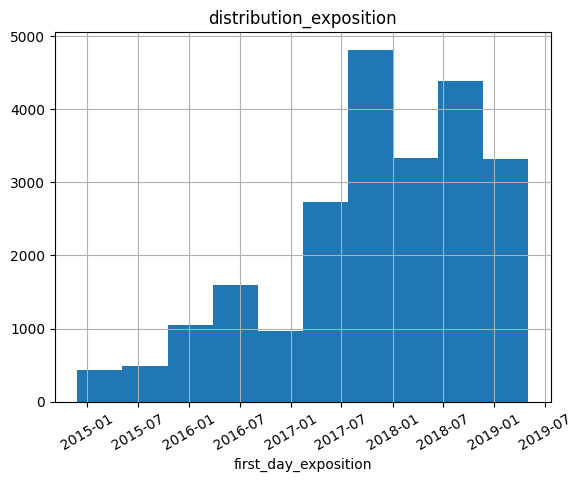

In [188]:
dev['first_day_exposition'] = pd.to_datetime(dev['first_day_exposition'], format='%Y-%m-%d')
print('Первая дата', dev['first_day_exposition'].min()) 
print('Последняя дата', dev['first_day_exposition'].max())

plt.hist(dev['first_day_exposition'])
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('first_day_exposition')
plt.title('distribution_exposition')
plt.show()

Данные предоставлены с ноября 2014 по май 2019.  
Рост продаж недвижимости произошел в первом квартале 2017г.

Пропусков: 3133
Тип данных: float64
Детально:
count    19985.00
mean       182.50
std        220.82
min          1.00
25%         45.00
50%         97.00
75%        234.00
max       1580.00
Name: days_exposition, dtype: float64


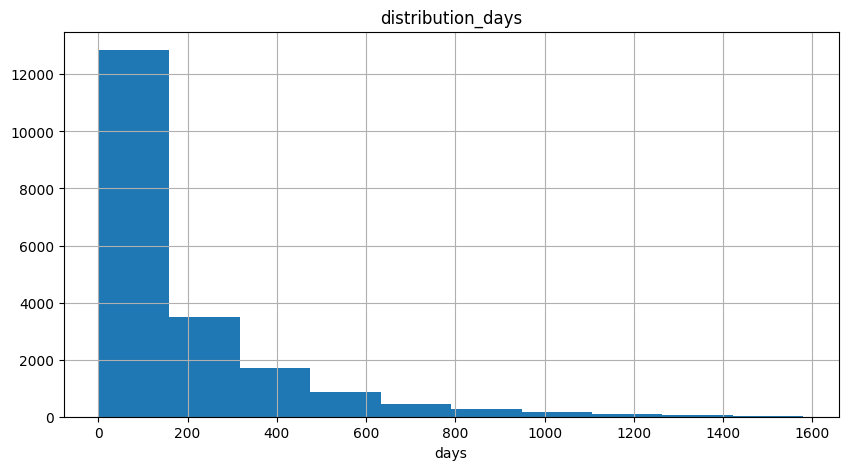

In [189]:
total_describe(dev, 'days_exposition')
hist_creature(dev['days_exposition'], 'days', 'distribution_days')

Основная масса квартир продаются в период до 6 месяцев (180 дней).  
3179 пропусков, которые говорят о том, что объявление всё еще не снято.  


In [190]:
dev[dev['days_exposition'].isnull()].sort_values('first_day_exposition').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
15857,6,25000000.0,145.2,2014-11-27,3,NaN,5,60.7,5,False,...,40.2,0,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
3291,8,8200000.0,52.5,2014-11-27,1,NaN,8,21.5,2,False,...,15.1,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3873,7,20100000.0,117.6,2014-11-27,3,NaN,8,62.5,7,False,...,21.5,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
6922,17,29999000.0,133.5,2014-12-08,3,3.0,15,71.7,12,False,...,19.8,2,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN
16327,3,17800000.0,117.7,2014-12-09,3,3.0,8,62.5,2,False,...,21.5,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
5956,10,25600000.0,159.3,2014-12-09,4,NaN,8,86.6,3,False,...,22.5,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
260,8,17250000.0,102.4,2014-12-09,3,NaN,8,53.2,3,False,...,19.3,1,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
3056,20,45900000.0,143.0,2014-12-09,2,3.3,8,83.5,6,False,...,19.4,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,NaN
11811,3,7500000.0,46.9,2014-12-09,1,3.0,8,19.0,3,False,...,11.9,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN
15614,3,19400000.0,117.7,2014-12-09,3,3.0,8,62.6,5,False,...,21.3,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN


Можно увидеть, что есть очень старые(от 2014г).  
Есть предположение, что их авторы просто забыли их снять, однако мы не можем с уверенностью это утверждать, потому с пропусками делать ничего не будем.

#### rooms

Пропусков: 0
Тип данных: int64
Детально:
count    23118.00
mean         2.09
std          1.06
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64


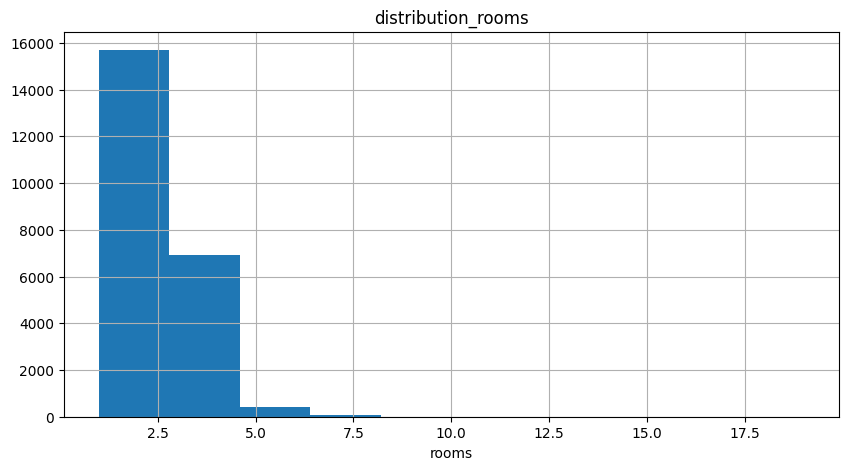

In [191]:
total_describe(dev, 'rooms')
hist_creature(dev['rooms'], 'rooms', 'distribution_rooms')

Основная масса 1-3к квартир.  
Количество комнат более 5 крайне редкое явление, относительно общей массы.  

In [192]:
dev[dev['rooms'] > 12].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000.0,245.4,2016-03-31,14,NaN,4,168.3,2,False,...,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


19 комнат всё же выглядят сомнительно, особенно при площади меньшей или равной 14,15 комнатам.  
Удалим.

In [193]:
dev = dev[dev['rooms'] < 19]

#### ceiling_height

Пропусков: 8885
Тип данных: float64
Детально:
count    14232.00
mean         2.76
std          0.91
min          1.00
25%          2.51
50%          2.65
75%          2.80
max         32.00
Name: ceiling_height, dtype: float64


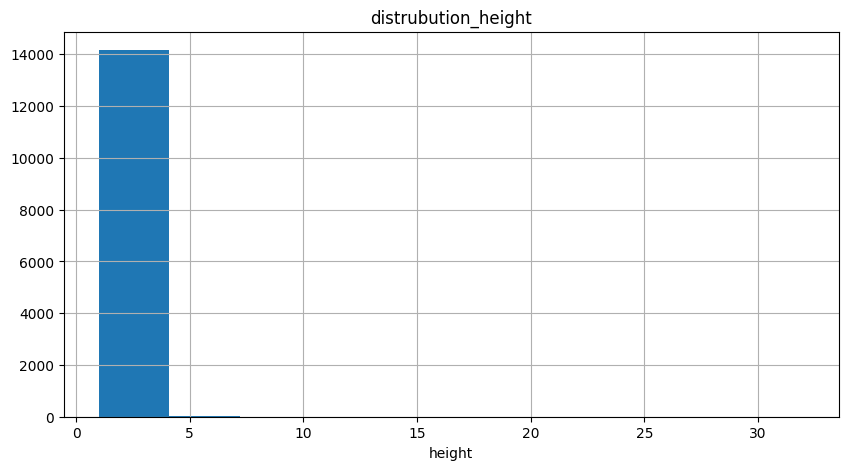

In [194]:
total_describe(dev, 'ceiling_height')
hist_creature(dev['ceiling_height'], 'height', 'distrubution_height')

К высотам потолков много вопросов.  
Весомое количество пропусков, минимальная высота в 1 метр, максимальная в 100.  
Основное количество объявлений с высотой от 2 до 10 метров.  

Заметный столбик в периоде от 20 до 40 метров позволяет предположить, что это опечатка и значение нужно разделить на 10.

In [195]:
dev.update(dev[(dev['ceiling_height'] >= 20) & (dev['ceiling_height'] <= 40)]['ceiling_height']/10)

Вновь обратимся к СНиП. Минимальная допустимая высота 2,5м.  
При этом, если добавить в такой квартире натяжной потолок (10-15см в высоту), то останется около 2,35м, потому, предлагаю брать за минимум именно эту величину, округлив её вниз до 2,3м, т.к. потолок может быть и многоуровневый и "съесть" больше 15см.
Посмотрим на всё, что в высоту меньше 2,3м.

In [196]:
dev[dev['ceiling_height'] < 2.3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.500000,6,False,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.000000,4,False,...,6.00,1,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.600000,9,False,...,8.80,2,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.500000,1,False,...,5.20,0,Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5,17.600000,5,False,...,9.00,0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17,15.200000,12,False,...,10.10,0,Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12,3,2.00,5,63.900000,2,False,...,12.00,0,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03,1,2.00,5,20.000000,5,False,...,6.00,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17,1,1.75,37,17.400000,5,False,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
17496,15,6700000.0,92.90,2019-02-19,3,2.00,17,53.200000,14,False,...,12.00,5,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN


Выглядит неправдоподобно.  
Думаю, будет корректно такие записи удалить из датасета.

In [197]:
dev = dev[(dev['ceiling_height'].isna()) | (dev['ceiling_height'] >= 2.3)]

Теперь перейдем к максимальным значениям.  
В интернее можно найти вполне реалные объявления о продаже пентахаусов с высотой потолков 10 метров(2х-3х уровневые).  
Предлагаю отталкиваться от этой высоты.

In [198]:
dev[dev['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,9.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Всего 3 строки.  
Самое подозрительно здесь - 3я строка с высотой потолка 100м, на 5ом этаже пятиэтажки, площадью 25кв.м и совершенно без фото.  
Без сожалений удаляем.
Остальные два объявления так же не совсем пропорционально выглядят относительно площади и этажа (не последний, что было бы характерно для пентхауса).  
Потому, удалим все 3.

In [199]:
dev = dev[(dev['ceiling_height'].isna()) | (dev['ceiling_height'] <= 10)]

Пропуски в высоте потолков предлагаю заполнить медианой в зависимости от этажности здания, т.к. 5этажки, 9этажки(и т.д) и высотки строились примерно в одинаковые периоды и по похожим проектом, из чего можно сделать вывод, что и высоты потолков будут схожи.

Но для начала нам нужно разбить имеющуюся этажность на категории мы возьмем следующие распределения:  
1. Всё, что по 9ый этаж отнесем к "малоэтажкам", т.к. это будут, в основном, дома старого фонда  
2. С 10-25 этаж к "многоэтажкам" - стандартные современные многоквартирники  
3. С 26 и выше - к "высоткам".

In [200]:
# создадим функцию для категоризации
def categories_floors(floor):
    try:
        if floor <= 9:
            return 'малоэтажка'
        if 9 < floor <= 25:
            return 'многоэтажка'
        if floor > 25:
            return 'высотка'
    except:
        pass

In [201]:
dev['floors_total_category'] = dev['floors_total'].apply(categories_floors)

In [202]:
#присвоим пропускам медианные значения в зависимости от категории этажности здания
dev['ceiling_height'] = dev['ceiling_height'].fillna(dev.groupby('floors_total_category')['ceiling_height'].transform('median'))
#удалим лишнюю колонку
dev = dev.drop('floors_total_category', axis=1)

Пропусков: 0
Тип данных: float64
Детально:
count    23098.00
mean         2.70
std          0.23
min          2.30
25%          2.60
50%          2.64
75%          2.70
max          8.30
Name: ceiling_height, dtype: float64


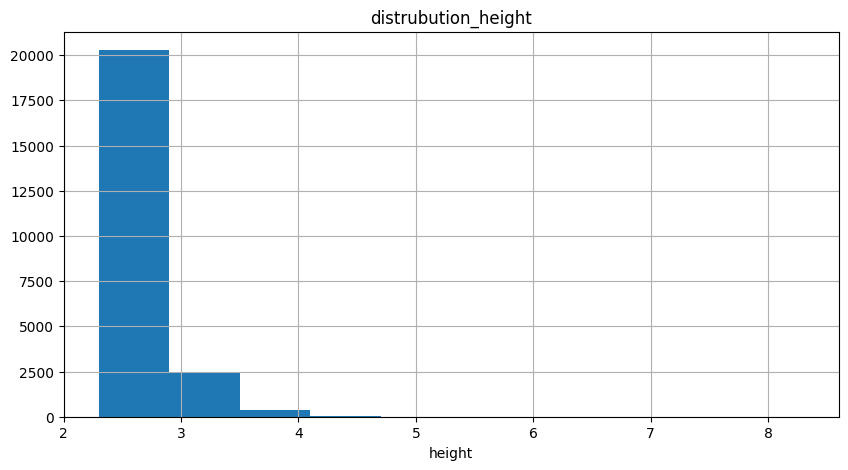

In [203]:
total_describe(dev, 'ceiling_height')
hist_creature(dev['ceiling_height'], 'height', 'distrubution_height')

Теперь распределение высот выглядит равномерно и логично.  

#### parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest

Пропусков: 5281
Тип данных: float64
Детально:
count    17817.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64


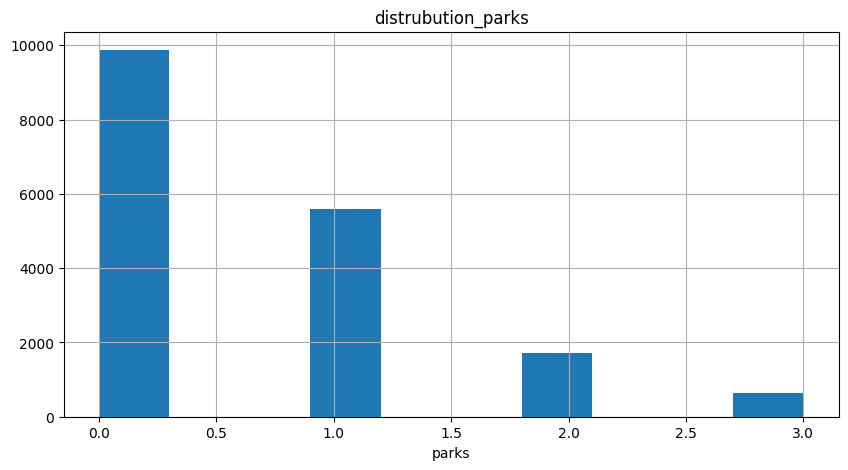

In [204]:
total_describe(dev, 'parks_around_3000')
hist_creature(dev['parks_around_3000'], 'parks', 'distrubution_parks')

Пропусков: 5281
Тип данных: float64
Детально:
count    17817.00
mean         0.77
std          0.94
min          0.00
25%          0.00
50%          1.00
75%          1.00
max          3.00
Name: ponds_around_3000, dtype: float64


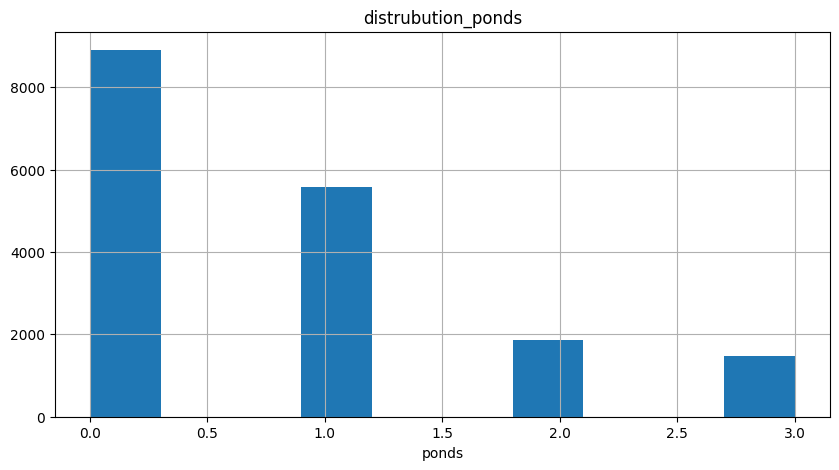

In [205]:
total_describe(dev, 'ponds_around_3000')
hist_creature(dev['ponds_around_3000'], 'ponds', 'distrubution_ponds')

Чаще всего ни парков, ни водоемов поблизости нет.  
С пропусками поступим по той же логике, что и с балконами. Если не указано - значит нет. И сразу заменим тип данныхна целочисленный.

In [206]:
dev['ponds_around_3000'] = dev['ponds_around_3000'].fillna(0).astype('int')
dev['parks_around_3000'] = dev['parks_around_3000'].fillna(0).astype('int')

Пропусков: 15147
Тип данных: float64
Детально:
count    7951.00
mean      490.71
std       342.53
min         1.00
25%       288.00
50%       454.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64


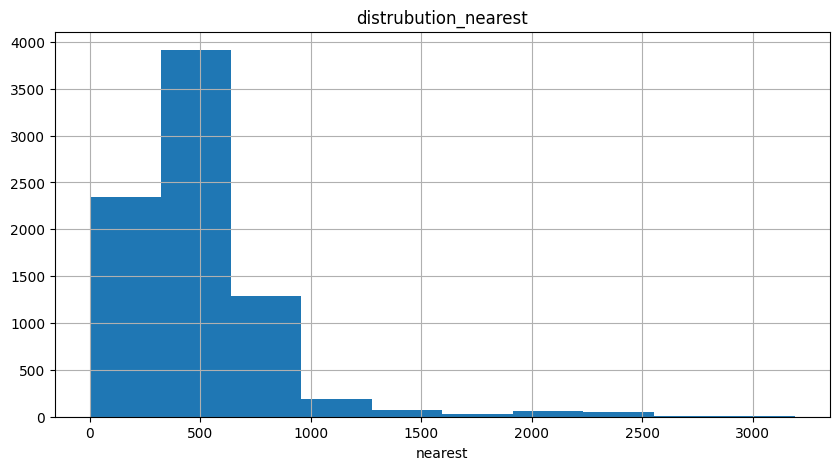

In [207]:
total_describe(dev, 'parks_nearest')
hist_creature(dev['parks_nearest'], 'nearest', 'distrubution_nearest')

Пропусков: 14185
Тип данных: float64
Детально:
count    8913.00
mean      517.85
std       277.39
min        13.00
25%       294.00
50%       502.00
75%       730.00
max      1344.00
Name: ponds_nearest, dtype: float64


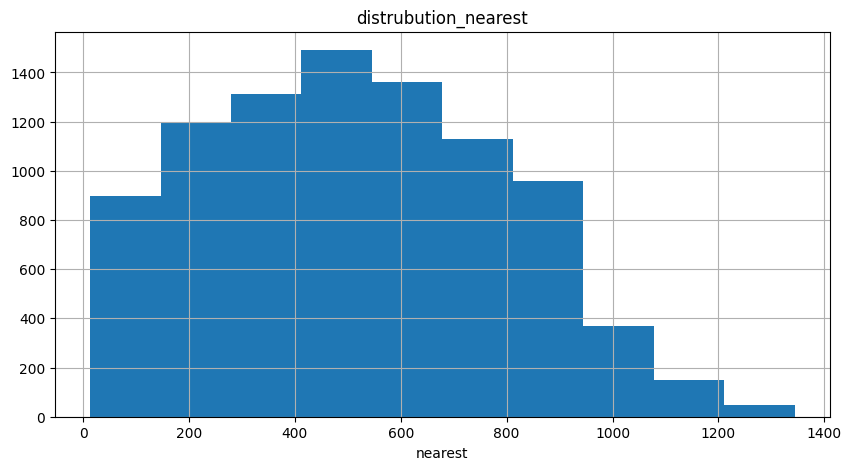

In [208]:
total_describe(dev, 'ponds_nearest')
hist_creature(dev['ponds_nearest'], 'nearest', 'distrubution_nearest')

Пропуски по расстоянию удаленности от парков и водоемов логично заменить не получится, оставляем.  
75% квартир (где водоемы поблизости вообще есть) продаются с водоемами в менее чем 729 метрах, это не удивительно для СПб.  
Парки 75перцентиль до 65км, если вообще есть.

Осталось проверить, что нет ошибок, когда указано, что есть парк или водоем в пределах 3км, а расстояние больше 3000м.

In [209]:
display(dev.query('ponds_nearest > 3000 and ponds_around_3000 != 0')['ponds_around_3000'].sum())
dev.query('parks_nearest > 3000 and parks_around_3000 != 0')['parks_around_3000'].sum()

0

0

#### airports_nearest, city_centers_nearest

Пропусков: 5305
Тип данных: float64
Детально:
count    17793.00
mean     28846.47
std      12637.39
min          0.00
25%      18605.00
50%      26771.00
75%      37348.00
max      84869.00
Name: airports_nearest, dtype: float64


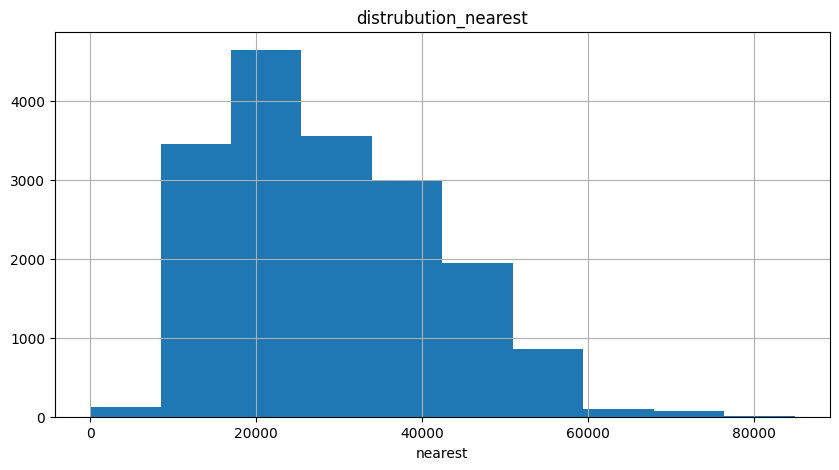

In [210]:
total_describe(dev, 'airports_nearest')
hist_creature(dev['airports_nearest'], 'nearest', 'distrubution_nearest')

Большая часть квартир находится на расстоянии до 37км от аэропорта, что не удивтительно, т.к. 65% объявление - Санкт-Петербург.
Расстояние в 0м всё же невозможно. Да, есть жилые дома в непосредственной близости от Пулково, но не в 0 метров, потому найдем их и удалим.

In [211]:
display((dev['airports_nearest'] == 0).sum()) 
dev = dev.query('airports_nearest != 0')

1

Пропуски мы логично заполнить не можем.

Пропусков: 5282
Тип данных: float64
Детально:
count    17815.00
mean     14212.21
std       8647.89
min        181.00
25%       9234.00
50%      13095.00
75%      16295.00
max      65968.00
Name: city_centers_nearest, dtype: float64


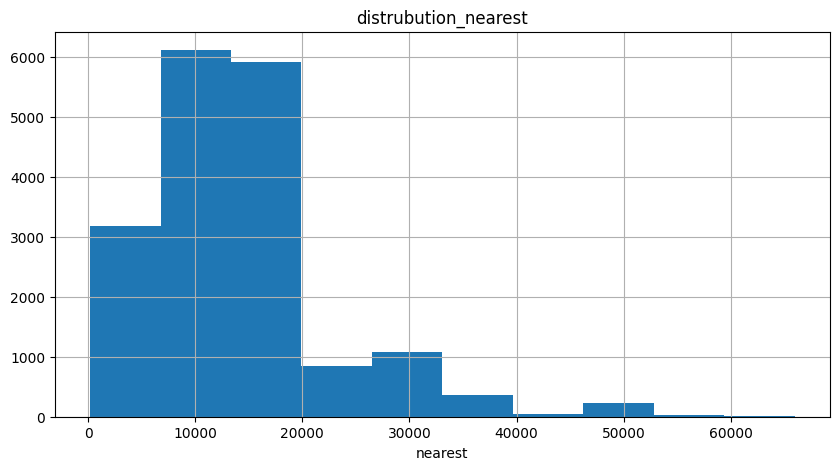

In [212]:
total_describe(dev, 'city_centers_nearest')
hist_creature(dev['city_centers_nearest'], 'nearest', 'distrubution_nearest')

Самые частые квартиры находятся на расстоянии от 8 до 20 км от центра.  
Пропуски мы здесь аналогичноудалить не можем.

**Вывод**  

На этапе предобработки были проделаны следующие манипуляции: 
1. Мы выяснили, что данные предоставлены с 2014 по 2019г
2. Столбцы датасета были переименованы эстетически корректны. 
3. Были устранены неявные дубликаты в наименовании населенных пунктов. 
4. Устранены артефакты в площадях квартир, стоимости жилья, высоте потолков, расстоянии до аэропорта.  
5. Где это логически обосновано, пропуски были заменеы: признак апартаментов, количество балконов, парков и прудов, этажность здания, площади в жилых и кухонных помещениях, высота потолков.
6. Были изменены типы данных:  
    is_apartment поменяли на bool в соответствии с документацией к датасету  
    first_day_exposition заменили на datetime  
    balcony, floors_total, parks_around_3000, ponds_around_3000 - заменили на int.

### Добавление новых расчетные столбцов

#### Цена одного квадратного метра

In [213]:
dev['price_mk'] = (dev['last_price'] / dev['total_area']).round(2)

#### День недели, месяц и год публикации объявления

In [214]:
dev['weekday'] = dev['first_day_exposition'].dt.weekday
dev['month'] = dev['first_day_exposition'].dt.month
dev['year'] = dev['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [215]:
dev['floor_category'] = 'other'
dev.loc[dev['floor'] == 1, 'floor_category'] = 'first'
dev.loc[dev['floor'] == dev['floors_total'], 'floor_category'] = 'last'

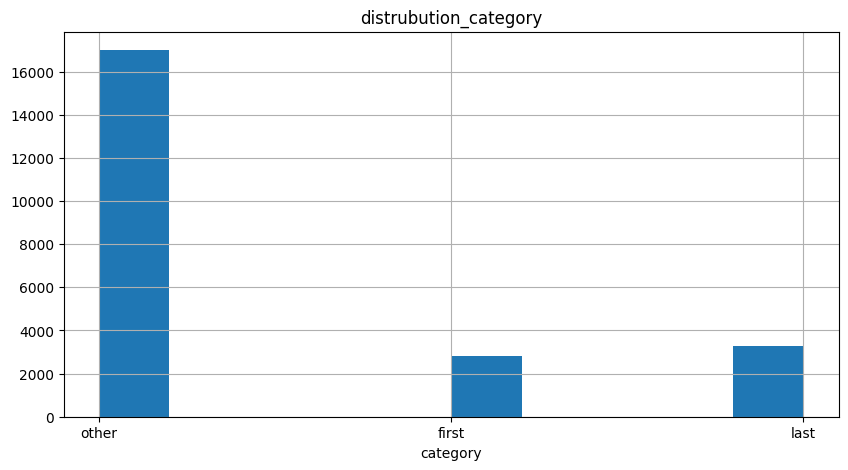

In [216]:
# изучим распределение по этажам, согласно создвнным категориям
hist_creature(dev['floor_category'], 'category', 'distrubution_category')

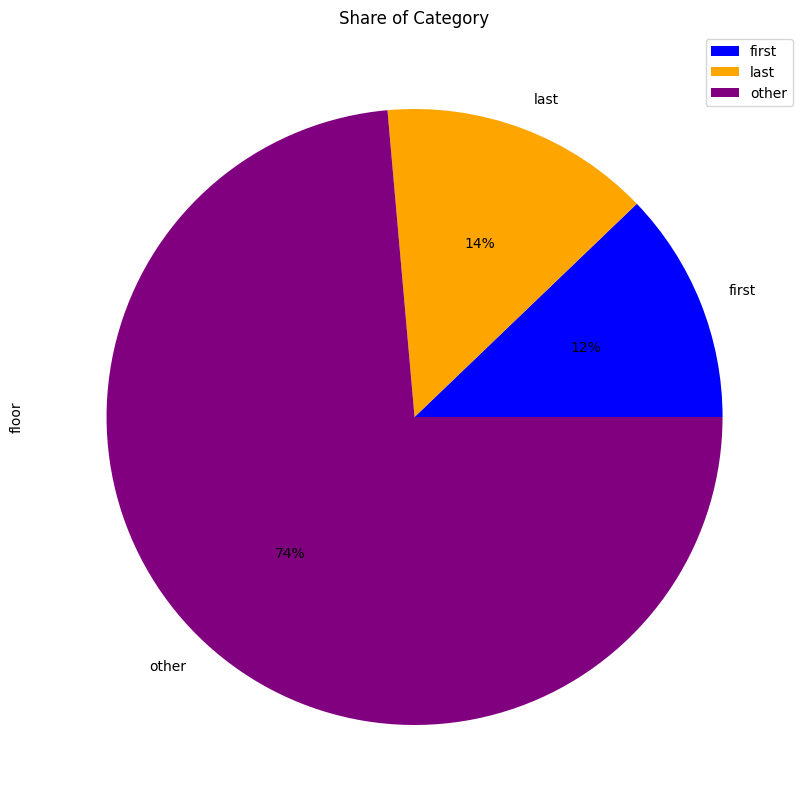

In [217]:
dev.groupby(['floor_category']).count().plot(kind='pie', figsize=(10,10), y='floor', autopct='%1.0f%%',
 colors = ['blue', 'orange', 'purple'],
 title='Share of Category')
plt.show()

Как и ожидалось, большая часть(74%) продаваемых квартир находится не на 1 или последнем этаже.  
Первый и последний занимают практически одинаковую долю - 12% и 14% соответственно.

#### Расстояние до центра города в км

In [218]:
dev['city_centers_nearest_km'] = (dev['city_centers_nearest'] / 1000).round(0)

## Шаг 3. Исследовательский анализ данных

После окончательного приведения датасета к нужному нам виду, перейдем к более детальному исследованию.

### Анализ времени продажи жилья

Пропусков: 3129
Тип данных: float64
Детально:
count    19968.00
mean       182.56
std        220.88
min          1.00
25%         45.00
50%         97.00
75%        234.00
max       1580.00
Name: days_exposition, dtype: float64


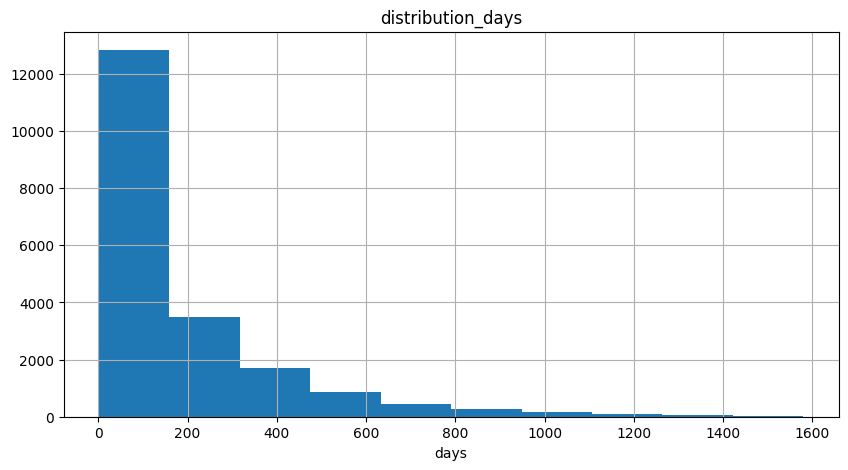

In [219]:
total_describe(dev, 'days_exposition')
hist_creature(dev['days_exposition'], 'days', 'distribution_days')

Мы помним, что пропуски означают, что объявление всё еще актуально.  
Самая быстрая продажа - за 1 день,  
Самая долгая - 4,3 года (во всяком случае, именно через столько объявление сняли).  
В среднем, объявления висят 3 месяца, при этом медианное значение практически в два раза ниже,   
видимо, это связано с несколькими очень долго висевшими объявлениями.  

Посмотрим поближе 75перцентиль (0-232 дня)

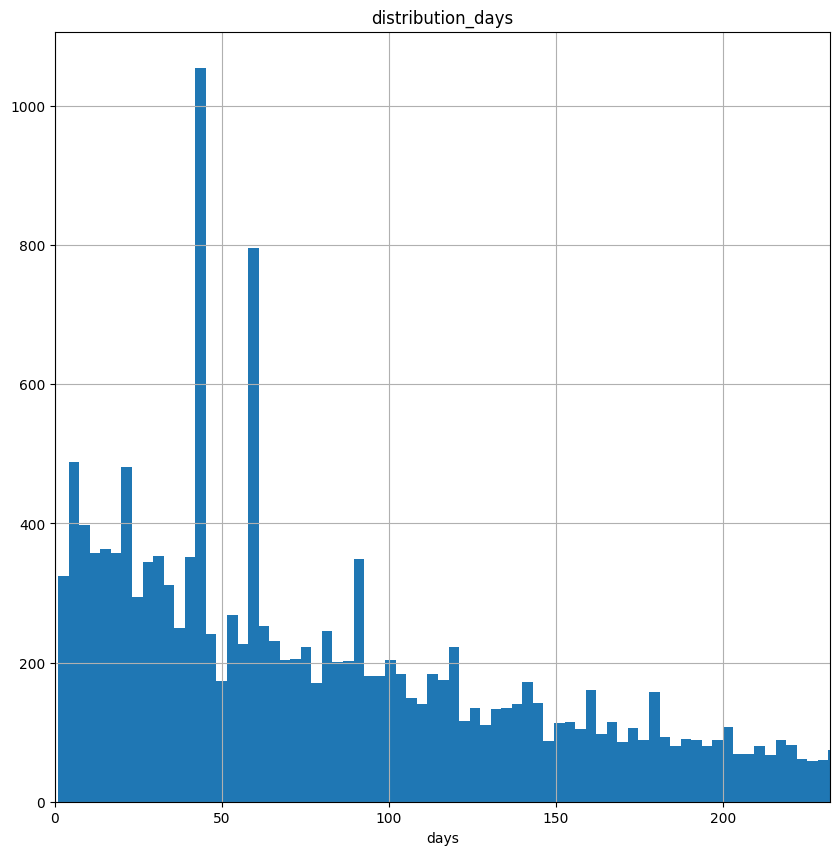

In [220]:
plt.figure(figsize=(10,10))    
dev.days_exposition.hist(bins=500)
plt.xlabel('days')
plt.title('distribution_days')
plt.xlim(0,232)
plt.show()

Видим пики около 40 и 60 дней. Сложно предположить с чем именно это связано.  
Посмотрим на выбросы, чтбы определить Быстрые и Слишком долгие продажи.

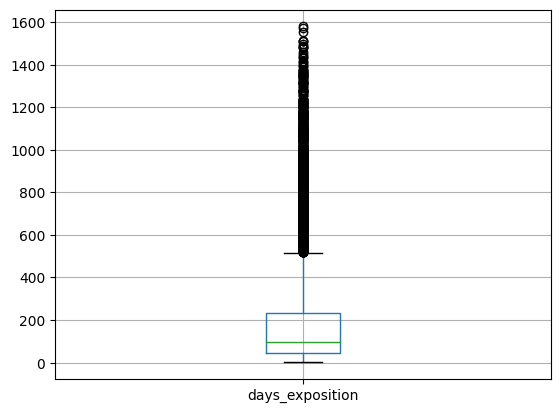

In [221]:
dev.boxplot('days_exposition')
plt.show()

Всё, что выше верхнего "уса", расположено слишком плотно, чтобы считать это буквально аномальными выбросами.  
Однако всё же их можно считать "слишком долгими".
Посмотрим поближе для опеделения точных границ "усов". 

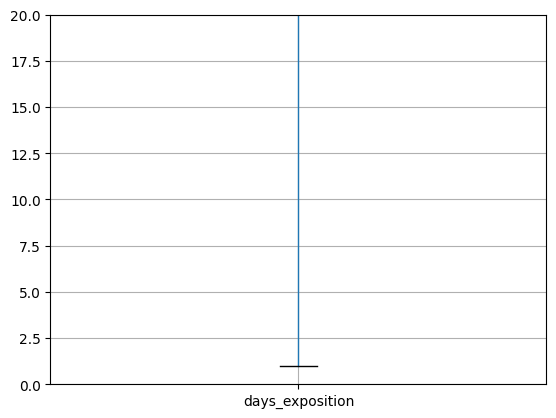

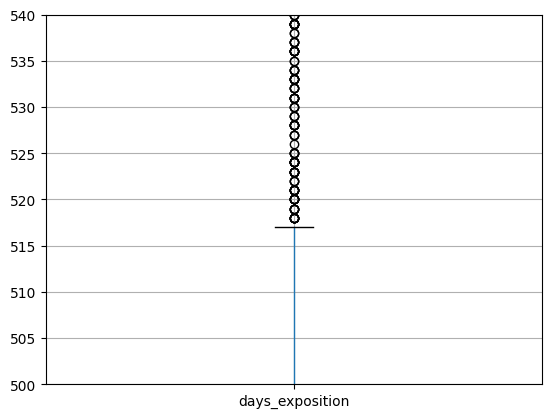

In [222]:
dev.boxplot('days_exposition')
plt.ylim(0,20) #граница нижнего "уса"
plt.show()
dev.boxplot('days_exposition')
plt.ylim(500,540) #граница верхнего "уса"
plt.show()

Что ж, Быстрая продажа - 1день  
Слишком долгая - от 512 дней или 1,4года.

### Влияние различных факторов на цену продажи недвижимости

In [223]:
# Подготовим функцию
def relation_price(df, column):
    data = df.pivot_table(
    index=column, 
    values='last_price', 
    aggfunc='mean'
    )
    print(data)
    ax = data.plot(xticks=data.index, style='o-')
    ylab = ax.set_ylabel('price')

#### Год, месяц, день недели

        last_price
year              
2014  1.221483e+07
2015  8.576707e+06
2016  6.907353e+06
2017  6.496122e+06
2018  6.003972e+06
2019  6.840258e+06


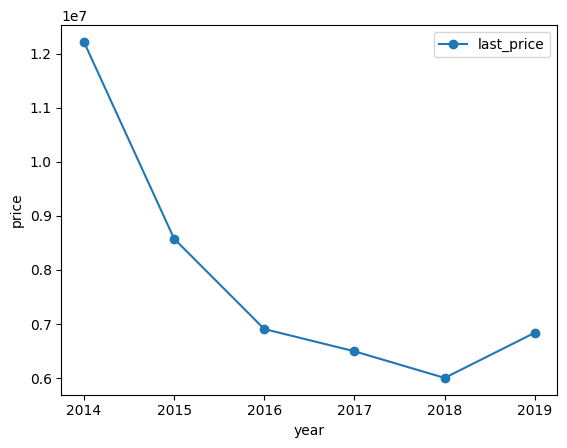

In [224]:
relation_price(dev, 'year')

Самые дорогие объявления от 2014г.  
С наступлением кризиса с 2014 по 2015 резкое падение и  по 2018 год объявления продолжали дешеветь, а с 2018 по 2019 начали расти.  
Возможно, это связано с ростом количества новостроек в конце 2010ых.
Но есть гипотеза, что это связано с изменением площадей квартир. Стоит проверить.

In [225]:
# Подготовим функцию
def relation_area(df, column):
    data = df.pivot_table(
    index=column, 
    values='total_area', 
    aggfunc='mean'
    )
    print(data)
    ax = data.plot(xticks=data.index, style='o-')
    ylab = ax.set_ylabel('price')

      total_area
year            
2014   86.688120
2015   71.890705
2016   62.787600
2017   61.226802
2018   58.207497
2019   59.963806


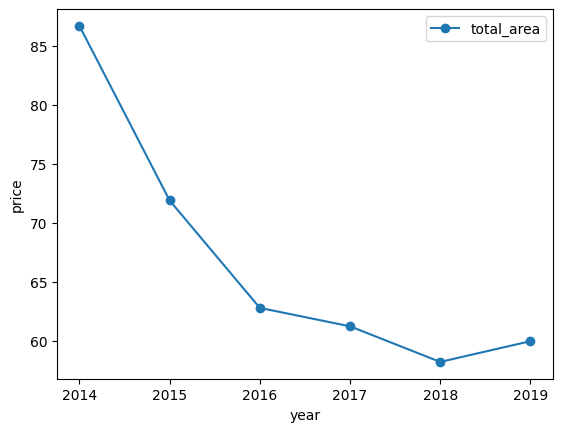

In [226]:
relation_area(dev, 'year')

И действительно, график изменения площадей продаваемых квартир практически идентичен графику цен.  
Таким образом. на изменение цен продаваемых квартир за данный период скорее повлияла пощадь объектов в новых застройка.

         last_price
month              
1      6.771311e+06
2      6.532339e+06
3      6.420824e+06
4      6.792215e+06
5      6.704125e+06
6      6.341820e+06
7      6.684708e+06
8      6.414916e+06
9      6.525100e+06
10     6.228084e+06
11     6.501618e+06
12     6.845416e+06


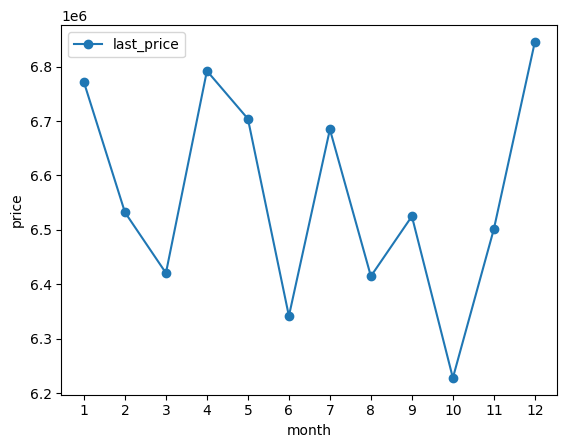

In [227]:
relation_price(dev, 'month')

Пиковые месяцы Декабрь, Январь, Апрель.  
По самым низким ценам объявления о продаже размещают в марте, июне и октябре.

           last_price
weekday              
0        6.563232e+06
1        6.463782e+06
2        6.549169e+06
3        6.776083e+06
4        6.432418e+06
5        6.638671e+06
6        6.327543e+06


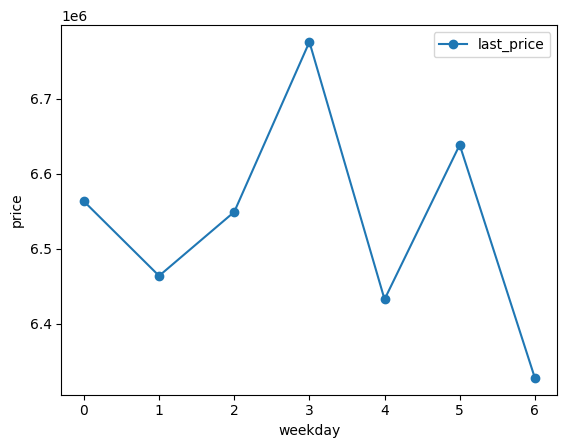

In [228]:
relation_price(dev, 'weekday')

Пик приходится на четверг и субботу. Самые дешевые объявления размещают в воскресенье.

#### Корреляция цены от других параметров

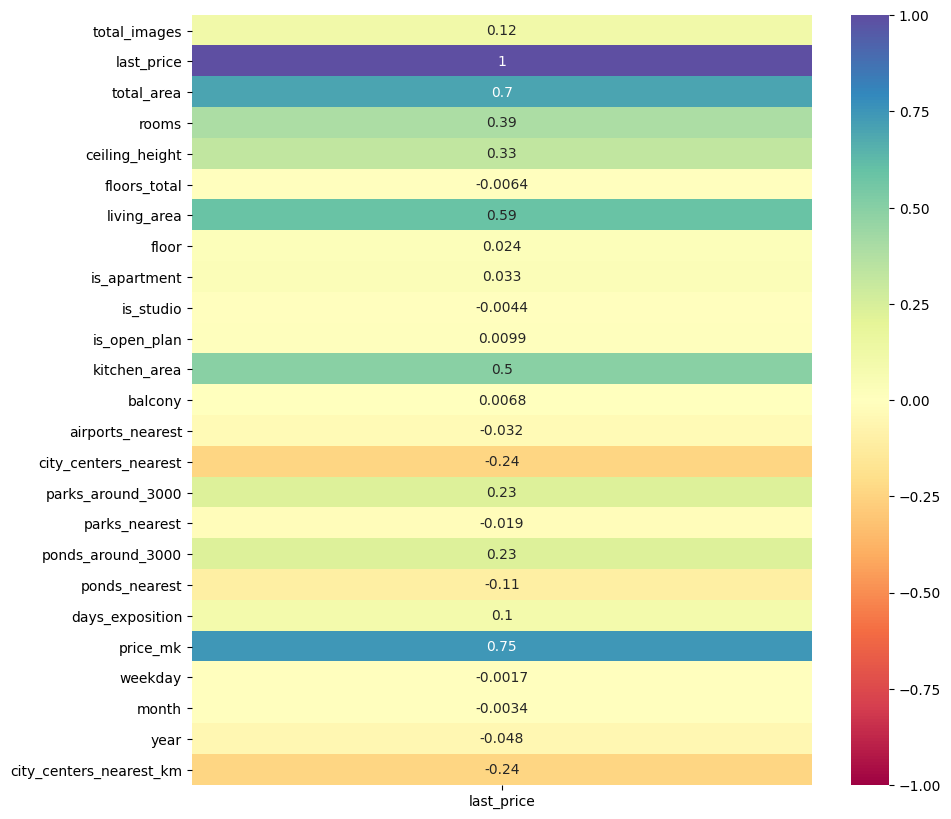

In [229]:
plt.figure(figsize=(10,10)) #зададим размер хитмэпа
sns.heatmap(dev.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, fmt='.2g', cmap='Spectral') 
#построим хитмэп корреляции для большей наглядности
plt.show()

Итак, наибольшее влияние на цену оказывают Общая площадь, площадь жилого помещения, площадь кухни, количество комнат.

#### Площади: общая, жилая, кухни

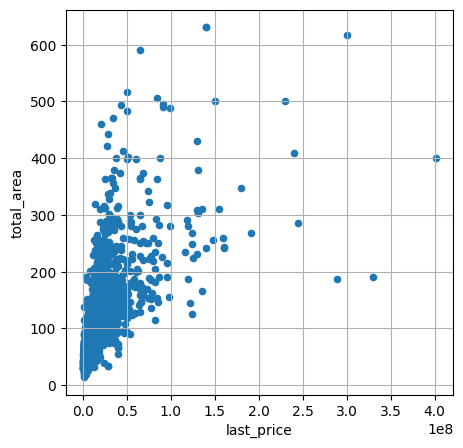

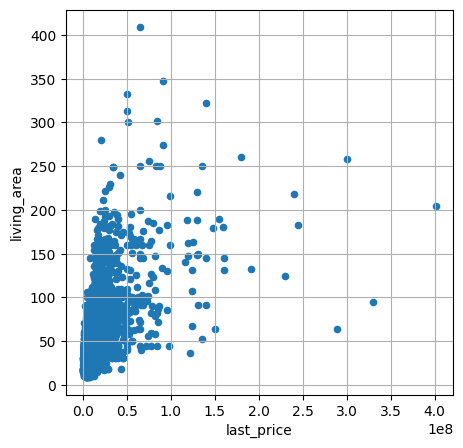

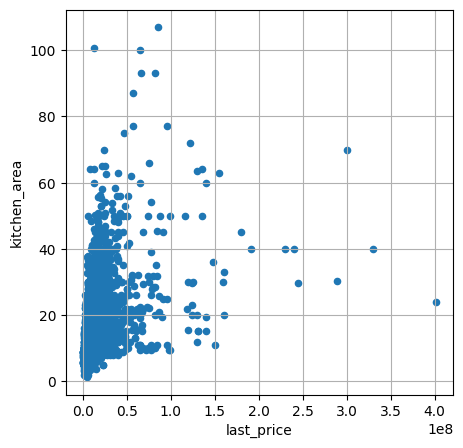

In [230]:
dev.plot(x='last_price', y='total_area', kind='scatter', grid=True, figsize=(5,5))
dev.plot(x='last_price', y='living_area', kind='scatter', grid=True, figsize=(5,5))
dev.plot(x='last_price', y='kitchen_area', kind='scatter', grid=True, figsize=(5,5))
plt.show()

Во всех трех случаях прямая корреляция четкая при стоимости жилья до 10млн, дальшеше уже похоже на рандом, во-первых, потому что там не так много значений, во-вторых, видимо, там больше сказываются какие-то другие факторы, думаю, год постройки, ремонт и тд.

#### Количства комнат

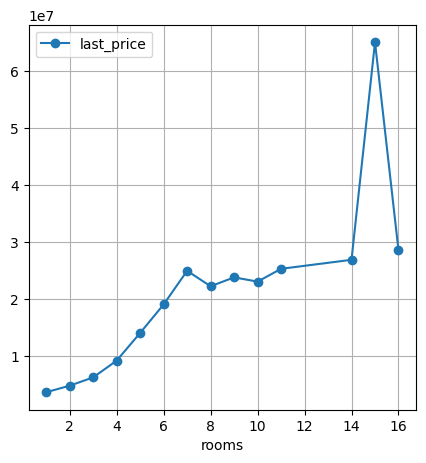

In [231]:
dev.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(figsize=(5,5), grid=True, style='o-')
plt.show()

#### Этажа

Здесь, аналогично, четкая прямая зависимость до 7 комнат, по той же причине, что дальше очень мало таких данных (с большим количеством комнат)

                last_price
floor_category            
first            3950000.0
last             4300000.0
other            4900000.0


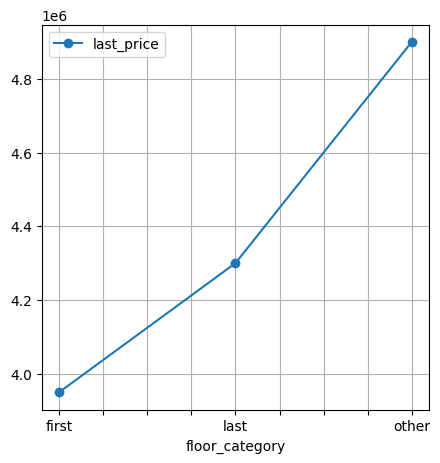

In [232]:
print(dev.pivot_table(index='floor_category', values='last_price', aggfunc='median'))
dev.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(figsize=(5,5), grid=True, style='o-')
plt.show()

Здесь всё давольно очевидно, жилеё на крайних этажах дешевле, чем на остальных.  

### Изучим Топ городов по количеству объявлений

In [233]:
top_local = dev[dev['locality_name'].isin(dev['locality_name'].value_counts().index[:10])]
top_local.locality_name.value_counts()

Санкт-Петербург    15383
Мурино               501
Шушары               430
Кудрово              426
Всеволожск           381
Пушкин               368
Колпино              335
Парголово            320
Гатчина              302
Выборг               229
Name: locality_name, dtype: int64

Ничего не поменялось, более 60% объявлений - Санкт-Петербург.

In [234]:
print(top_local.pivot_table(index='locality_name', values='price_mk',  aggfunc='mean')
        .sort_values(by='price_mk', ascending=False)
        .round(2))

                  price_mk
locality_name             
Санкт-Петербург  114456.75
Пушкин           103180.40
Кудрово           94839.73
Парголово         90262.96
Мурино            85054.13
Шушары            78172.32
Колпино           75396.77
Всеволожск        68748.24
Гатчина           68699.55
Выборг            58123.07


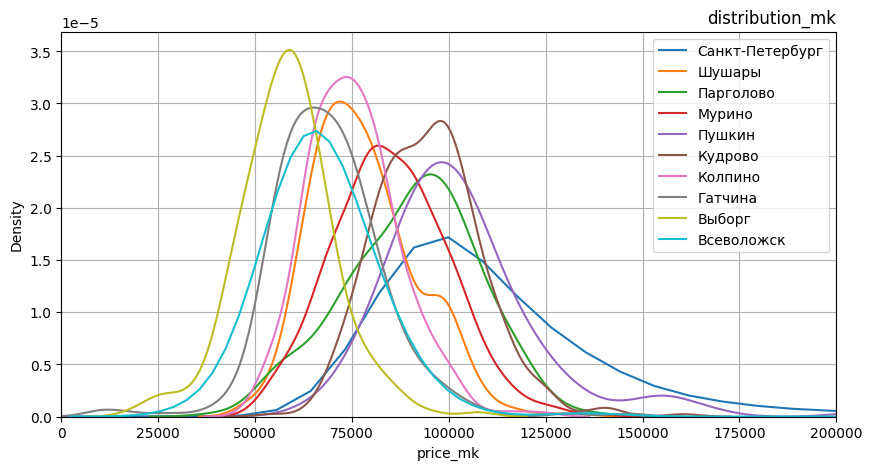

In [235]:
fig, ax = plt.subplots(figsize=(10, 5)) 

for locality in top_local['locality_name'].unique():
    sns.kdeplot(top_local[top_local['locality_name'] == locality]['price_mk'], label = locality)

plt.grid(True)
plt.legend()
plt.title('distribution_mk', loc = 'right')
plt.xlabel('price_mk')
plt.xlim((0,200000)) # ограничение оси X
plt.show()

Ожидаемо, самая высокая средняя цена в Санкт-Петербурге (114т.р) и Пушкине (103т.р).  
Самая низкая - Выборг (58т.р)  

Так же, на графике распределения цены можно увидеть, что узкие пики приведут к низкой средней цене, даже если они высокие.

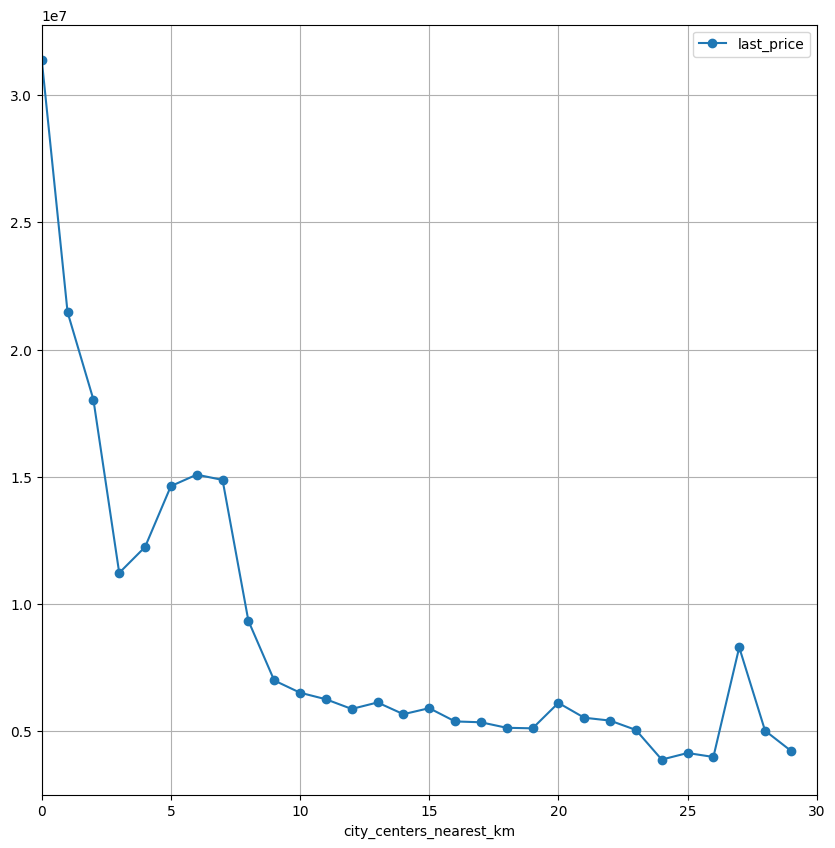

In [236]:
dev.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='city_centers_nearest_km', values='last_price'
).plot(figsize=(10,10), grid=True, style='o-', xlim = (0,30))
plt.show()

Общая тенденция такая:
чем дальше от центра, тем ниже цена.  
Есть небольшой скачок в районе 5-7км.
Возможно, там какие-то элитные жилые квартал, но давайте попробуем посмотреть.

In [237]:
dev.query('locality_name == "Санкт-Петербург"').sort_values(by='last_price',ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_mk,weekday,month,year,floor_category,city_centers_nearest_km
14706,15,401300000.0,401.0,2016-02-20,5,2.60,9,204.0,9,False,...,545.0,1,478.0,393.0,1000748.13,5,2,2016,last,2.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,519.0,3,285.0,233.0,1736842.11,2,4,2018,other,1.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,NaN,2,198.0,111.0,485436.89,0,12,2017,other,5.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,386.0,3,188.0,NaN,1542604.80,1,3,2019,last,1.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,400.0,3,140.0,249.0,857542.88,0,4,2017,other,6.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,NaN,2,198.0,199.0,585365.85,5,4,2017,last,5.0
5893,3,230000000.0,500.0,2017-05-31,6,2.60,7,123.9,7,False,...,NaN,2,198.0,50.0,460000.00,2,5,2017,last,5.0
8900,13,190870000.0,268.0,2016-03-25,3,2.60,8,132.0,7,False,...,NaN,2,198.0,901.0,712201.49,4,3,2016,other,5.0
19865,20,180000000.0,347.0,2015-01-21,8,3.90,6,260.0,3,False,...,537.0,3,501.0,834.0,518731.99,2,1,2015,other,4.0
19155,20,160000000.0,243.0,2018-11-12,5,2.60,5,145.0,4,False,...,285.0,1,200.0,18.0,658436.21,0,11,2018,other,1.0


Всё оказалось проще, это бОльшие по площади квартиры на последних этажах, возможно пентхаусы, дают этот скачок.  
Значит, общая тенденция подтверждается, при прочих равных, чем дальше от центра, тем дешевле.

# Общий вывод

Мы исследовали датасет, содержащий объявления о продаже квартир с 2014г по 2019г по Санкт-Петербургу и Лен.области.  
Часть данных в объявлениях заполнялась пользователями, часть была подтянута автоматически из карт.  
И то и другое может приводить к различным аномалиям, что нам и нужно было, по возможности, исправить перед непосредственным исследованием.  

**1.**  
**На этапе предобработки были проделаны следующие манипуляции:**

    1) Мы выяснили, что данные предоставлены с 2014 по 2019г  
    2) Столбцы датасета были переименованы эстетически корректны.  
    3) Были устранены неявные дубликаты в наименовании населенных пунктов.  
    4) Устранены артефакты в площадях квартир, стоимости жилья, высоте потолков, расстоянии до аэропорта.  
    5) Где это логически обосновано, пропуски были заменеы: признак апартаментов, количество балконов, парков и прудов, этажность здания, площади в жилых и кухонных помещениях, высота потолков.
    6) Были изменены типы данных:  
_is_apartment_ поменяли на bool в соответствии с документацией к датасету
_first_day_exposition_ заменили на datetime
_balcony, floors_total, parks_around_3000, ponds_around_3000_ - заменили на int.  

**2.**  
**Категоризировали данные и добавили следующие столбцы:**  
  _weekday_ день недели, когда было выложено объявление о продаже  
_month_ месяц  
_year_ год  
_price_mk_ цена квадратного метра  
_floor_category_ тип этажа квартиры (первый, последний, другой)  
_city_centers_nearest_km_ расстояние до центра города перевели в км.  

**3.**  
**В результате исследования пришли к следующим выводам:**   
    1) Около 65% квартир продают именно в Санкт Петербурге  
    2) 74% квартир продают на этажах не крайних (не первый и не последний)  
    3) Есть очень быстрые продажи в 1 день и очень долгие от 512 дней или 1,4г  
    4) Есть объявления совсем без фотографий (около 4%)  
    5) Больше всего объявлений в малоэтажках (2-8) и находящихся на на не высоких этажах (2-4)  
    6) Медианная цена продаваемых квартир - 4,6млн, Средняя - 6,5млн  
    7) Большинство объявлений с квартирами до 100кв.м, среднее значение - 35кв, медианное - 52  
    При этом есть квартиры всего лишь в 12кв.м и несколько объявлений около 600кв.м.  
    8) Больше всего квартир продают на 1-3комнату, но встречаются и на 15-17  
    9) Мы выявили, что на стоимость кваритр влияют следующие факторы:  
        Площадью (общей, жилой, кухни)  
        Количеством комнат  
        Этаж (не первый и не последний)  
        А так же, чем дальше дом находится от центра СПб, тем дешевле будет квартира.  
    10) Чаще всего, ни парков, ни водоемов в пределах 3км у продаваемых квартир не будет. Но если всё же да, то, в основном, в пределах 1км.  
    11) Было обнаружено, что с 2014 по 2018 год цена сильно снижалась, однако, связано это с площадями продаваемых квартир.
    12) ТОП 10 городов по количеству объявлений:  
        Санкт-Петербург  
        Мурино  
        Шушары   
        Кудрово   
        Всеволожск  
        Пушкин   
        Колпино  
        Парголово  
        Гатчина  
        Выборг  
     При этом, самый дорогой кв.м по Санкт-Петербургу (114т.р) и Пушкину (103т.р)., а самый дешевый в Выборге (58т.р)
        
      